In [1]:
backup_dir = 'gas-sensor-array-temperature-modulation'
backup_file_1 = '20160930_203718.csv'
backup_path_1 = backup_dir + '/' + backup_file_1

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D, MaxPooling1D, Flatten
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
def import_data(data_source, col_names=None):
    return pd.read_csv(data_source, names=col_names)

In [5]:
#read the file of first measurement (performed at 2016-09-30) as a data frame:
df20160930 = import_data(backup_path_1)
col_names = df20160930.columns.values

In [ ]:
#show the head of the data frame:
df20160930.head(20)

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445
5,1.544,0.0,55.8400,26.6200,240.8361,0.2020,60.1083,74.3444,81.5100,29.7970,72.9643,83.1477,80.5302,58.0412,39.2482,65.0981,67.8697,63.5316,50.3730,63.3641
6,1.854,0.0,55.8400,26.6200,240.7602,0.2010,64.1020,74.3444,76.4748,28.1797,72.4181,78.4368,79.0768,59.7614,40.4067,64.1416,61.6173,60.5007,50.6424,66.2847
7,2.163,0.0,55.8400,26.6200,240.6845,0.2009,62.6869,71.3877,73.8965,27.6523,64.4007,69.7912,72.5239,55.6363,39.6271,62.7987,65.8307,56.5195,50.3730,64.3090
8,2.472,0.0,55.8400,26.6200,240.6624,0.2009,54.8336,67.0368,69.2228,27.4429,64.9211,63.9055,63.5872,54.0730,40.5881,64.1416,63.9090,53.0811,48.9146,63.3641
9,2.781,0.0,55.8400,26.6200,240.6519,0.2003,51.2600,64.5303,61.4312,25.6881,54.7235,57.2118,59.6255,55.6363,40.9928,61.9071,60.3791,52.7888,48.3640,62.4461


In [ ]:
#make a correlated data frame:
#finding pairwise correlation of all columns in the dataframe.
#Any na values are automatically excluded. For any non-numeric data type columns
#in the dataframe it is ignored.
df20160930_corr=df20160930.corr()


<Axes: >

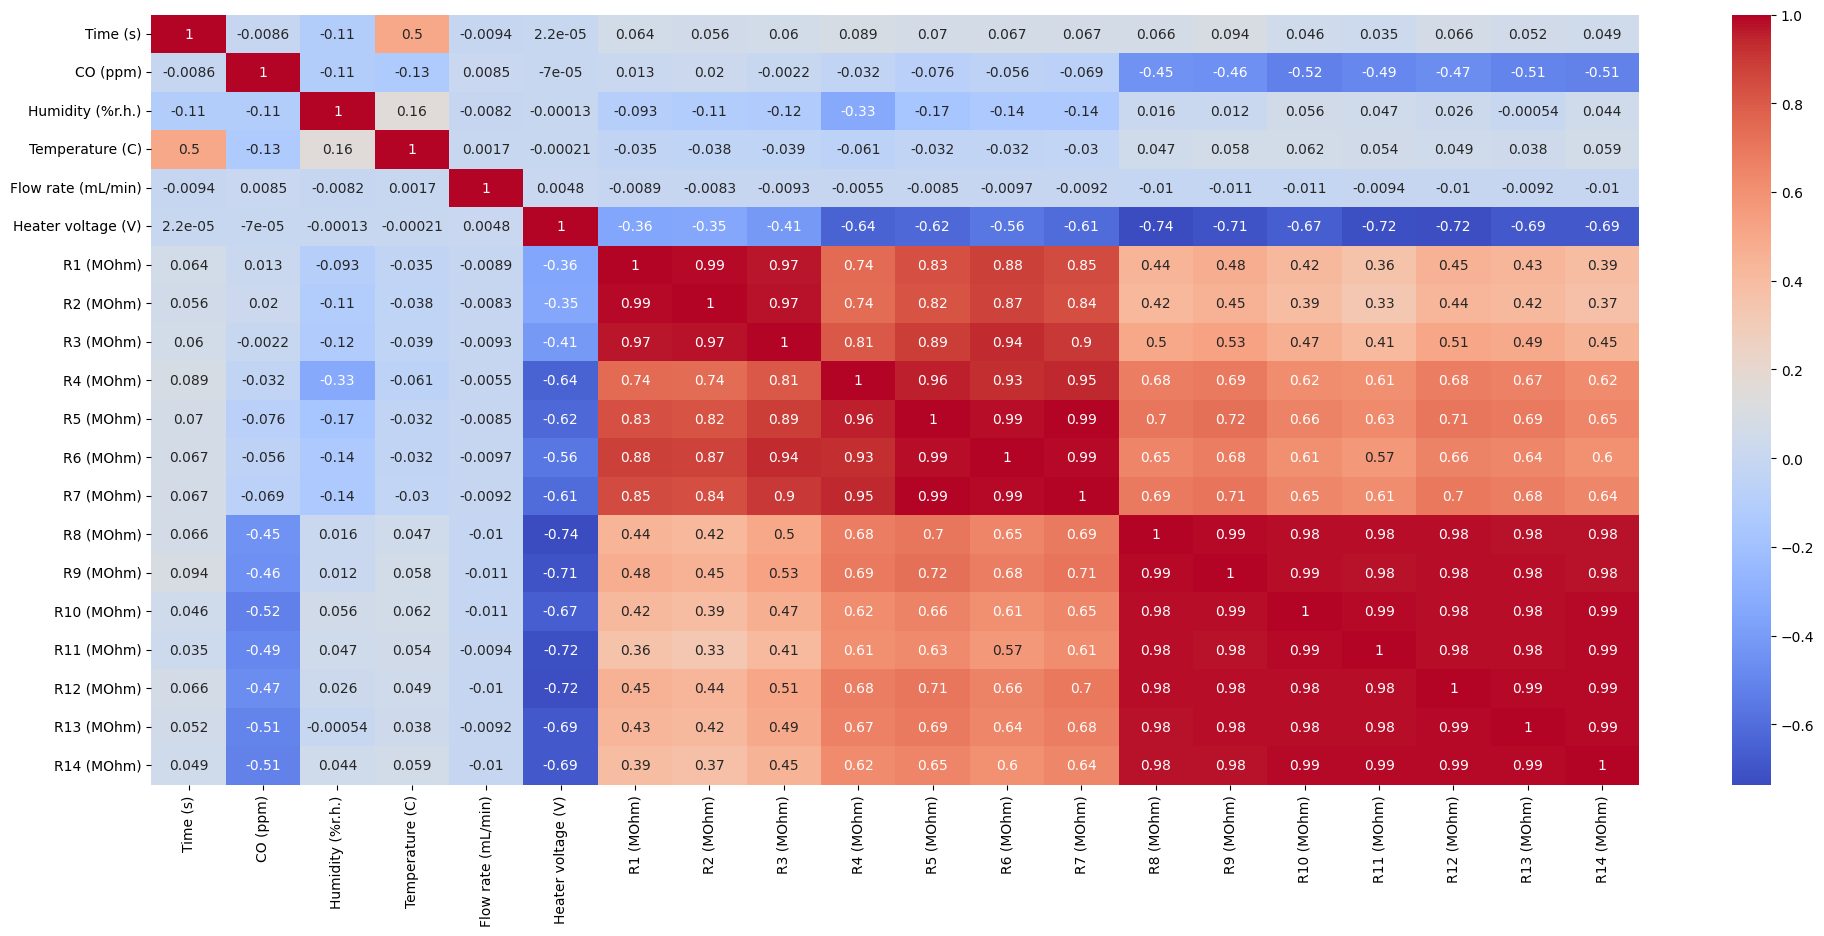

In [ ]:
#define the size of the plot:
plt.figure(figsize=(24,10))
#plot heatmap plot of the correlated data frame:
sns.heatmap(df20160930_corr,cmap='coolwarm',annot=True)

In [ ]:
#show the details of the data frame
#(number and list of the columns names,data type of each column,...)
df20160930.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295719 entries, 0 to 295718
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time (s)            295719 non-null  float64
 1   CO (ppm)            295719 non-null  float64
 2   Humidity (%r.h.)    295719 non-null  float64
 3   Temperature (C)     295719 non-null  float64
 4   Flow rate (mL/min)  295719 non-null  float64
 5   Heater voltage (V)  295719 non-null  float64
 6   R1 (MOhm)           295719 non-null  float64
 7   R2 (MOhm)           295719 non-null  float64
 8   R3 (MOhm)           295719 non-null  float64
 9   R4 (MOhm)           295719 non-null  float64
 10  R5 (MOhm)           295719 non-null  float64
 11  R6 (MOhm)           295719 non-null  float64
 12  R7 (MOhm)           295719 non-null  float64
 13  R8 (MOhm)           295719 non-null  float64
 14  R9 (MOhm)           295719 non-null  float64
 15  R10 (MOhm)          295719 non-nul

In [ ]:
#show the shortened form of the full data frame (the first and last few rows are displayed)
df20160930

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295714,90908.545,0.0,62.3000,26.5800,0.0000,0.2000,5.5429,2.5713,10.3815,18.5796,36.4589,34.4549,38.3745,57.5888,45.7953,56.6351,56.4058,50.6129,43.0232,65.2822
295715,90908.853,0.0,62.3000,26.5800,0.0000,0.2000,4.5527,2.1454,8.5494,18.0592,36.6290,34.0052,37.6964,51.9752,45.0239,58.9374,61.6173,50.9361,43.4604,63.8761
295716,90909.162,0.0,62.3000,26.5800,0.0000,0.2000,3.7374,1.8492,7.1062,18.0087,36.0127,32.5056,37.1882,54.4724,45.0239,59.7462,57.1452,51.8182,42.5944,64.3090
295717,90909.469,0.0,62.3000,26.5800,0.0000,0.2000,3.1197,1.6190,5.9138,17.6950,37.5930,30.5253,35.9328,51.9752,45.5201,57.7289,60.3791,50.3466,42.4022,62.0375


In [ ]:
#show the list of total null values in each column:
df20160930.isnull().sum()

Time (s)              0
CO (ppm)              0
Humidity (%r.h.)      0
Temperature (C)       0
Flow rate (mL/min)    0
Heater voltage (V)    0
R1 (MOhm)             0
R2 (MOhm)             0
R3 (MOhm)             0
R4 (MOhm)             0
R5 (MOhm)             0
R6 (MOhm)             0
R7 (MOhm)             0
R8 (MOhm)             0
R9 (MOhm)             0
R10 (MOhm)            0
R11 (MOhm)            0
R12 (MOhm)            0
R13 (MOhm)            0
R14 (MOhm)            0
dtype: int64

In [6]:
#import libraries from scikit-learn to split data into train and test sets:
from sklearn.model_selection import train_test_split

In [7]:
#define object and featues in the data frame:
X = df20160930.drop('CO (ppm)',axis=1).drop('Humidity (%r.h.)', axis = 1).values
yCO = df20160930['CO (ppm)'].values
yH = df20160930['Humidity (%r.h.)'].values

In [8]:
#split data into train and test sets:
XCO_train, XCO_test, yCO_train, yCO_test = train_test_split(X, yCO, test_size=0.2, random_state=42)
XH_train, XH_test, yH_train, yH_test = train_test_split(X, yH, test_size=0.2, random_state=42)

In [16]:
# Check the type and shape
print(type(XCO_train))
print(XCO_train.shape, XCO_test.shape, yCO_train.shape, yCO_test.shape)

<class 'numpy.ndarray'>
(236575, 18) (59144, 18) (236575,) (59144,)


In [11]:
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# Begin isolation forest for outlier detection, x factor is time, test it against all other variables
clf = IsolationForest(max_samples=100, random_state=0, contamination=0.004)
clf.fit(df20160930[['CO (ppm)']])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.004, max_samples=100, random_state=0)

In [ ]:
outliers = clf.predict(df20160930[['CO (ppm)']])

In [ ]:
outliers_df = df20160930[['Time (s)', 'CO (ppm)']]
outliers_df = outliers_df.assign(outliers = outliers)

In [ ]:
outliers_df

,Time (s),R14 (MOhm),outliers
0,0.000,8.6385,1
1,0.309,41.9167,1
2,0.618,62.9436,1
3,0.926,64.8363,1
4,1.234,66.8445,1
...,...,...,...
295714,90908.545,65.2822,1
295715,90908.853,63.8761,1
295716,90909.162,64.3090,1
295717,90909.469,62.0375,1


In [ ]:
pd.unique(outliers)

array([1])

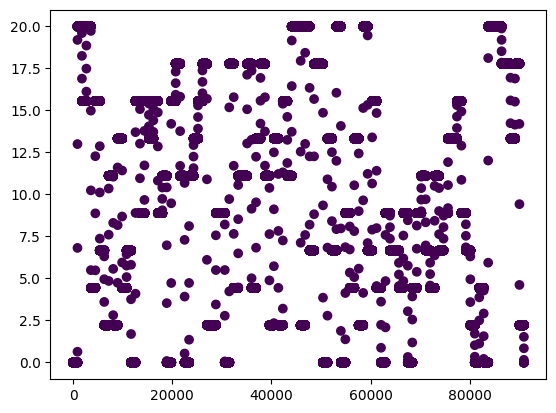

In [ ]:
fig = plt.scatter(x=outliers_df[['Time (s)']], y=outliers_df[['CO (ppm)']], c=outliers_df[['outliers']].values)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names,

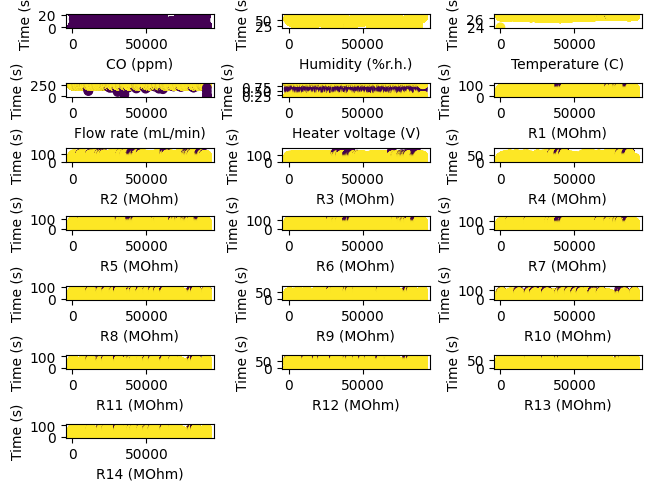

<Figure size 640x480 with 0 Axes>

In [ ]:
clfs = []
outlier_dfs = []
indey = 1
for col in col_names[1:]:
  clf = IsolationForest(may_samples=100, random_state=0, contamination=0.004)
  clf.fit(df20160930[[col]])
  outliers = clf.predict(df20160930[[col]])
  outliers_df = df20160930[[col_names[0], col]]
  outliers_df = outliers_df.assign(outliers = outliers)
  outlier_dfs.append(outliers_df)
  clfs.append(clf)




/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


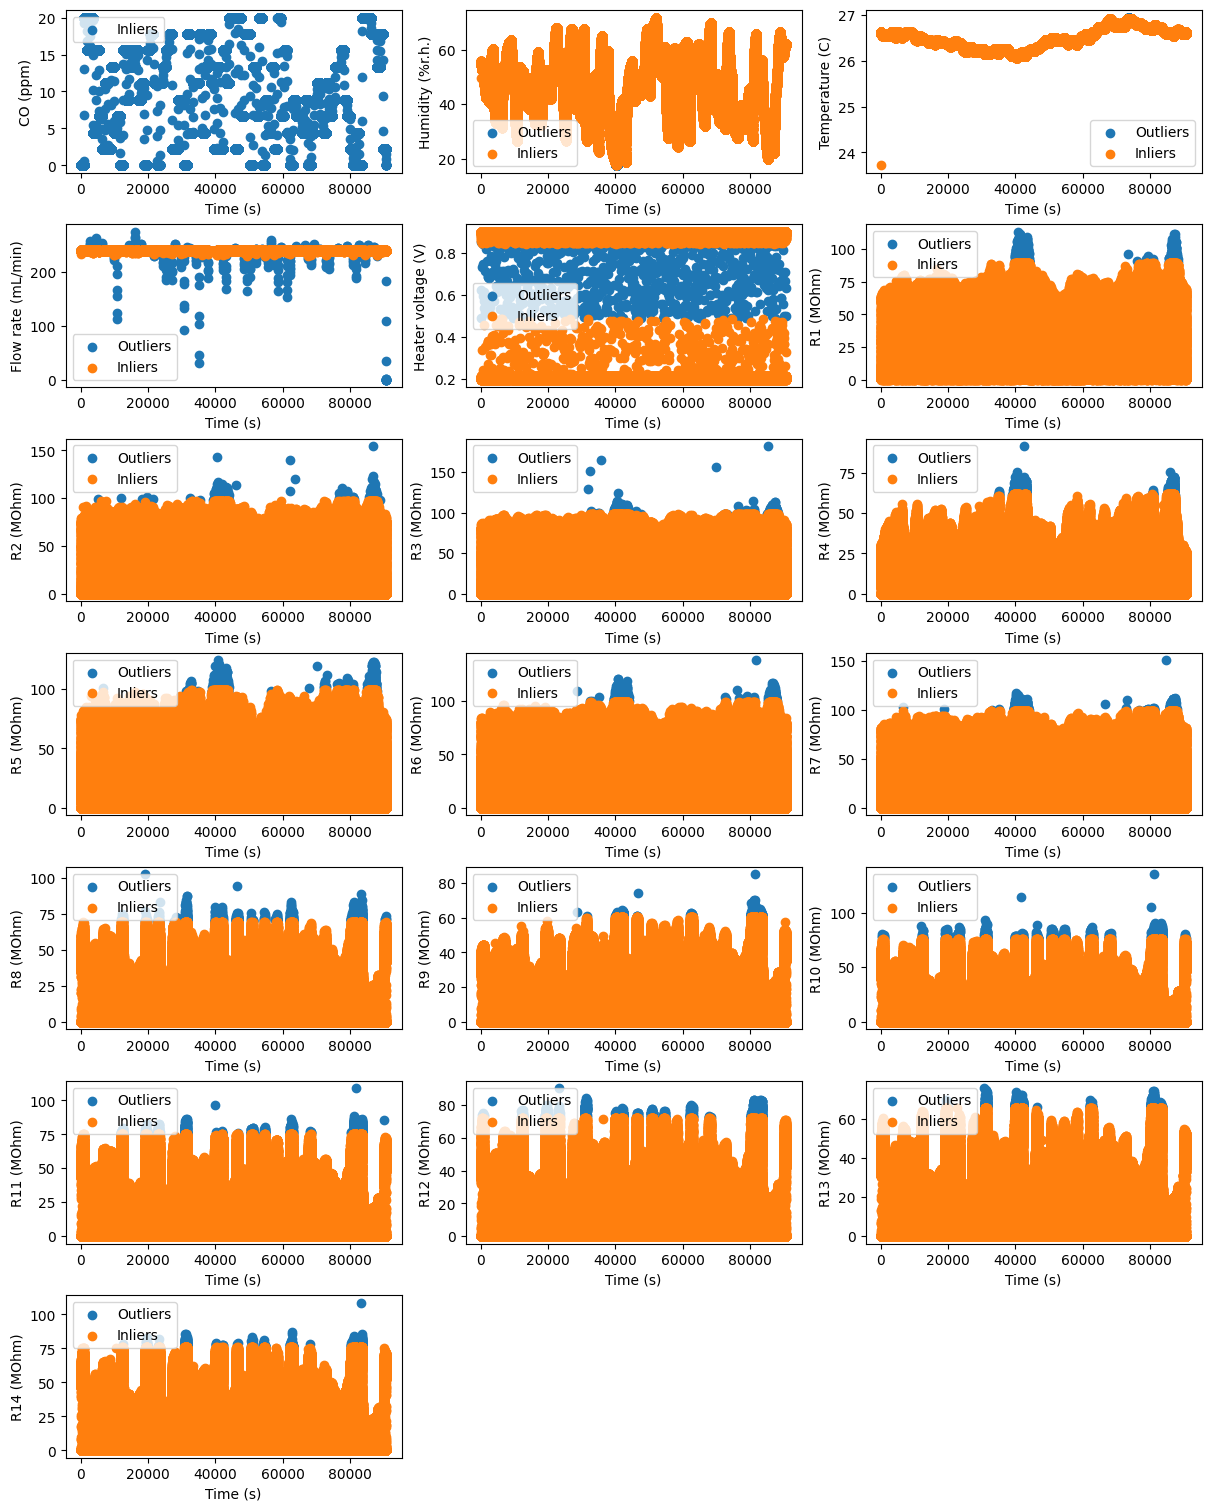

In [ ]:
fig = plt.figure(figsize=(12, 15), layout = "constrained")
labels = {
    -1: "Outliers",
    1: "Inliers"
}
index = 1
for i in range(len(col_names[1:])):
  col = col_names[i + 1]
  outliers_df = outlier_dfs[i]
  outlier_dfs.append(outliers_df)
  ax1 = fig.add_subplot(len(col_names)//3 + 1, 3, index)
  ax1.set_xlabel(col_names[0])
  ax1.set_ylabel(col)
  # Split the dataframe by outliers
  outliers_dict = dict(tuple(outliers_df.groupby(outliers_df['outliers'])))
  for outlier_key in outliers_dict.keys():
    outlier_data = outliers_dict[outlier_key]
    ax1.scatter(outlier_data.iloc[:,0], outlier_data.iloc[:,1], label = labels[outlier_key])
  ax1.legend()
  index += 1
plt.show()

In [ ]:
# Split the dataframe by outliers
outliers_dict = dict(tuple(outliers_df.groupby(outliers_df['outliers'])))

dict_keys([-1, 1])


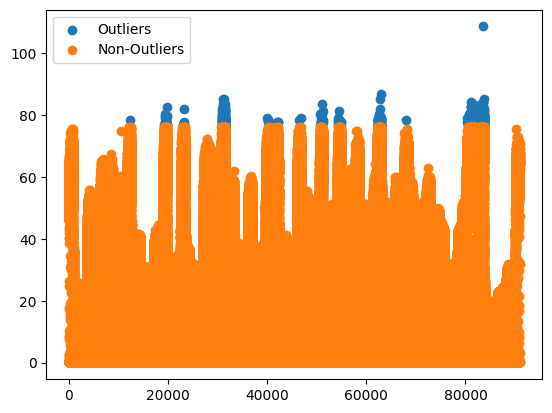

In [ ]:
print(outliers_dict.keys())
labels = {
    -1: "Outliers",
    1: "Non-Outliers"
}
for outlier_key in outliers_dict.keys():
  outlier_data = outliers_dict[outlier_key]
  plt.scatter(outlier_data.iloc[:,0], outlier_data.iloc[:,1], label = labels[outlier_key])
plt.legend()
plt.show()

In [12]:
def get_isolation_forest_data(df, col_names):
  '''Gets the isolation forests for each property in the dataframe'''
  # First column is the x value (ex: time)
  clfs = []
  outlier_dfs = []
  index = 1
  for col in col_names[1:]:
    clf = IsolationForest(max_samples=100, random_state=0, contamination=0.004)
    clf.fit(df[[col]])
    outliers = clf.predict(df[[col]])
    outliers_df = df[[col_names[0], col]]
    outliers_df = outliers_df.assign(outliers = outliers)
    outlier_dfs.append(outliers_df)
    clfs.append(clf)
  return (clfs, outlier_dfs)

In [13]:
def print_isolation_forest_graphs(outlier_dfs, col_names):
  '''Prints the isolation forest graphs'''
  fig = plt.figure(figsize=(12, 15), layout = "constrained")
  labels = {
      -1: "Outliers",
      1: "Inliers"
  }
  index = 1
  for i in range(len(col_names[1:])):
    col = col_names[i + 1]
    outliers_df = outlier_dfs[i]
    outlier_dfs.append(outliers_df)
    ax1 = fig.add_subplot(len(col_names)//3 + 1, 3, index)
    ax1.set_xlabel(col_names[0])
    ax1.set_ylabel(col)
    # Split the dataframe by outliers
    outliers_dict = dict(tuple(outliers_df.groupby(outliers_df['outliers'])))
    for outlier_key in outliers_dict.keys():
      outlier_data = outliers_dict[outlier_key]
      ax1.scatter(outlier_data.iloc[:,0], outlier_data.iloc[:,1], label = labels[outlier_key])
    ax1.legend()
    index += 1
  plt.show()

In [9]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler


In [23]:
# Make a linear SVR model (normal SVR takes too long) with a standard scaler
regr = make_pipeline(StandardScaler(), LinearSVR(C=1.0, epsilon=0.2))
regr.fit(XCO_train, yCO_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.2))])

In [24]:
# Predict the test data
y_predict = regr.predict(XCO_test)

In [15]:
from sklearn.metrics import mean_squared_error


In [27]:
rms = mean_squared_error(yCO_test, y_predict, squared=False)
print(rms)

4.3360239142161054


In [26]:
def get_main_metrics(actual, predict):
  '''Returns a tuple containing RMSE, RMSE / mean, RMSE / range, and MAPE'''
  # Calculate rmse
  diffs = actual - predict
  diffs_squared = diffs ** 2
  mu_diffs_squared = diffs_squared.mean()
  rmse = np.sqrt(mu_diffs_squared)

  # Calculate mean and range
  mean = np.mean(actual)
  range_val = max(actual) - min(actual)

  # Calculate MAPE
  percentages = diffs / actual
  abs_percentages = abs(percentages)
  mape = np.mean(abs_percentages)
  return (rmse, rmse/mean, rmse/range_val, mape)

In [29]:
get_main_metrics(yCO_test, y_predict)

<ipython-input-28-b82463fa5612>:14: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(4.3360239142161054, -43.251437612516284, 0.07292038506245285, inf)

In [17]:
def test_svr(scaler, x_train_data, y_train_data, x_test_data, y_test_data, C = 1.0, epsilon = 0.2, ):
  '''Tests the linear SVR'''
  regr = make_pipeline(scaler, LinearSVR(C=C, epsilon=epsilon))
  regr.fit(x_train_data, y_train_data)
  # Predict the test data
  y_predict = regr.predict(x_test_data)
  # Get the main metrics and return it along with the model
  return (regr, get_main_metrics(y_test_data, y_predict), y_predict)

In [18]:
# Do this for the other types of SVR
robust_co_svr = test_svr(RobustScaler(), XCO_train, yCO_train, XCO_test, yCO_test)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-14-b82463fa5612>:14: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


In [19]:
robust_co_svr[1]

(5.734254933366486, 3.455450786311886, 0.09808527548884809, inf)

In [20]:
# Do this for the other types of SVR
standard_h_svr = test_svr(StandardScaler(), XH_train, yH_train, XH_test, yH_test)
print(standard_h_svr[1])

(8.641300621456677, -7.395025631222885, 0.1320717558534088, 0.16203942320775805)


In [21]:
robust_h_svr = test_svr(RobustScaler(), XH_train, yH_train, XH_test, yH_test)
print(robust_h_svr[1])

(8.691610843806352, -15.847081996104489, 0.13320678898467592, 0.15960718192276)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
# Data with removed variables
#define object and featues in the data frame:
X_reduced = df20160930.drop(['Time (s)','Humidity (%r.h.)','CO (ppm)','R2 (MOhm)','R3 (MOhm)','R5 (MOhm)','R6 (MOhm)','R7 (MOhm)','R9 (MOhm)','R10 (MOhm)',
            'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)'],axis=1).values

In [12]:
#split data into train and test sets:
XCO_reduced_train, XCO_reduced_test, yCO_reduced_train, yCO_reduced_test = train_test_split(X_reduced, yCO, test_size=0.2, random_state=42)
XH_reduced_train, XH_reduced_test, yH_reduced_train, yH_reduced_test = train_test_split(X_reduced, yH, test_size=0.2, random_state=42)

In [33]:
standard_co_svr = test_svr(StandardScaler(), XCO_train, yCO_train, XCO_test, yCO_test)
print(standard_co_svr[1])
robust_co_svr = test_svr(RobustScaler(), XCO_train, yCO_train, XCO_test, yCO_test)
print(robust_co_svr[1])
standard_h_svr = test_svr(StandardScaler(), XH_train, yH_train, XH_test, yH_test)
print(standard_h_svr[1])
robust_h_reduced_svr = test_svr(RobustScaler(), XH_train, yH_train, XH_test, yH_test)
print(robust_h_svr[1])

<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(4.33652811405826, 0.43873223722036037, 0.216826405702913, inf)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(4.355878570601408, 0.4406899482894731, 0.21779392853007037, inf)
(8.64099493746546, 0.18786821955478789, 0.1586668185359064, 0.1620385647227809)
(8.691610843806352, -15.847081996104489, 0.13320678898467592, 0.15960718192276)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
standard_co_reduced_svr = test_svr(StandardScaler(), XCO_reduced_train, yCO_reduced_train, XCO_reduced_test, yCO_reduced_test)
print(standard_co_reduced_svr[1])
robust_co_reduced_svr = test_svr(RobustScaler(), XCO_reduced_train, yCO_reduced_train, XCO_reduced_test, yCO_reduced_test)
print(robust_co_reduced_svr[1])
standard_h_reduced_svr = test_svr(StandardScaler(), XH_reduced_train, yH_reduced_train, XH_reduced_test, yH_reduced_test)
print(standard_h_reduced_svr[1])
robust_h_reduced_svr = test_svr(RobustScaler(), XH_reduced_train, yH_reduced_train, XH_reduced_test, yH_reduced_test)
print(robust_h_reduced_svr[1])

<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(4.5912134012329044, 0.4644990817767244, 0.2295606700616452, inf)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(5.247239735734223, 0.5308701265021523, 0.2623619867867112, inf)
(10.202894818287875, 0.22182627089684903, 0.18734658131266757, 0.2027453477827167)
(10.19772972324923, 0.22171397396625667, 0.18725173931783384, 0.20208059230012967)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
from numpy import copy, concatenate, array

In [25]:
# We need to split the time series into various samples
def multi_sample_split(x_data, y_data_arrays, n_steps):
    # Merge everything into a single stack
    X, y = list(), list()
    x_copy = copy(x_data)
    for y_data in y_data_arrays:
      # print(type(y_data), y_data)
      y_shaped = y_data.reshape(-1, 1)
      # print(x_copy)
      # print(y_shaped)
      x_copy = concatenate((x_copy, y_shaped), axis = 1)
    sequences = x_copy
    print(len(y_data_arrays))
    # print(sequences)
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-len(y_data_arrays)], sequences[end_ix-1, -len(y_data_arrays):]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [35]:
n_steps = 3


XCO_reduced_train_sample, yCO_reduced_train_sample = multi_sample_split(XCO_reduced_train, [yCO_reduced_train], n_steps)
XCO_reduced_test_sample, yCO_reduced_test_sample = multi_sample_split(XCO_reduced_test, [yCO_reduced_test], n_steps)
XH_reduced_train_sample, yH_reduced_train_sample = multi_sample_split(XH_reduced_train, [yH_reduced_train], n_steps)
XH_reduced_test_sample, yH_reduced_test_sample = multi_sample_split(XH_reduced_test, [yH_reduced_test], n_steps)
XHCO_reduced_train_sample, yHCO_reduced_train_sample = multi_sample_split(XH_reduced_train, [yCO_reduced_train, yH_reduced_train], n_steps)
XHCO_reduced_test_sample, yHCO_reduced_test_sample = multi_sample_split(XH_reduced_test, [yCO_reduced_test, yH_reduced_test], n_steps)
n_features = XCO_reduced_train_sample.shape[2]

1
1
1
1
2
2


In [41]:
!pip install scikeras

In [42]:
from scikeras.wrappers import KerasRegressor

In [67]:
def basic_fnn(n_steps, n_features, n_outputs):
  model = Sequential()
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.50))
  model.add(Dense(n_outputs))
  model.compile(optimizer='adam', loss='mse', metrics = ["accuracy"])
  return model

In [100]:
def test_basic_fnn(scaler, x_train_data, y_train_data, x_test_data, y_test_data, n_steps, n_features, n_outputs):
  '''Tests the basic fnn'''
  # Transform each of the feature data
  x_train_data_c = copy(x_train_data)
  x_test_data_c = copy(x_test_data)
  for i in range(n_steps):
    x_train_data_c[:,i,:] = scaler.fit_transform(x_train_data_c[:,i,:], y_train_data)
    x_test_data_c[:,i,:] = scaler.fit_transform(x_test_data_c[:,i,:], y_test_data)
  regr = basic_fnn(n_steps, n_features, n_outputs)
  regr.fit(x_train_data, y_train_data, epochs=12,
                    validation_data=(x_test_data, y_test_data))
  # Predict the test data
  y_predict = regr.predict(x_test_data)
  # Get the main metrics and return it along with the model
  y_predict_shaped = y_predict[:,1,:].reshape(1, -1)[0]
  y_test_data_shaped = y_test_data.reshape(1, -1)[0]
  return (regr, get_main_metrics(y_test_data_shaped, y_predict_shaped), y_predict_shaped)

In [79]:
print(yCO_reduced_train_sample.reshape(1, -1)[0].shape)

(236573,)


In [80]:
yCO_reduced_train.shape

(236575,)

In [101]:
standard_co_reduced_fnn = test_basic_fnn(StandardScaler(), XCO_reduced_train_sample, yCO_reduced_train_sample, XCO_reduced_test_sample, yCO_reduced_test_sample, n_steps, n_features, 1)
print(standard_co_reduced_fnn[1])
robust_co_reduced_fnn = test_basic_fnn(RobustScaler(), XCO_reduced_train_sample, yCO_reduced_train_sample, XCO_reduced_test_sample, yCO_reduced_test_sample, n_steps, n_features, 1)
print(robust_co_reduced_fnn[1])
standard_h_reduced_fnn = test_basic_fnn(StandardScaler(), XH_reduced_train_sample, yH_reduced_train_sample, XH_reduced_test_sample, yH_reduced_test_sample, n_steps, n_features, 1)
print(standard_h_reduced_fnn[1])
robust_h_reduced_fnn = test_basic_fnn(RobustScaler(), XH_reduced_train_sample, yH_reduced_train_sample, XH_reduced_test_sample, yH_reduced_test_sample, n_steps, n_features, 1)
print(robust_h_reduced_fnn[1])

Epoch 1/12
7393/7393 [==============================] - 24s 3ms/step - loss: 49.7655 - accuracy: 3.2266e-04 - val_loss: 39.1347 - val_accuracy: 0.0000e+00
Epoch 2/12
7393/7393 [==============================] - 24s 3ms/step - loss: 41.6641 - accuracy: 0.0000e+00 - val_loss: 38.8766 - val_accuracy: 0.0000e+00
Epoch 3/12
7393/7393 [==============================] - 25s 3ms/step - loss: 39.8130 - accuracy: 0.0000e+00 - val_loss: 38.8625 - val_accuracy: 0.0000e+00
Epoch 4/12
7393/7393 [==============================] - 20s 3ms/step - loss: 39.4547 - accuracy: 0.0000e+00 - val_loss: 38.9832 - val_accuracy: 0.0000e+00
Epoch 5/12
7393/7393 [==============================] - 23s 3ms/step - loss: 39.3635 - accuracy: 0.0000e+00 - val_loss: 38.8947 - val_accuracy: 0.0000e+00
Epoch 6/12
7393/7393 [==============================] - 20s 3ms/step - loss: 39.3019 - accuracy: 0.0000e+00 - val_loss: 38.8543 - val_accuracy: 0.0000e+00
Epoch 7/12
7393/7393 [==============================] - 21s 3ms/step -

<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(6.603760808415452, 0.668096172732403, 0.3301880404207726, inf)
Epoch 1/12
7393/7393 [==============================] - 21s 3ms/step - loss: 65.2489 - accuracy: 0.0011 - val_loss: 39.9899 - val_accuracy: 0.0000e+00
Epoch 2/12
7393/7393 [==============================] - 20s 3ms/step - loss: 42.4703 - accuracy: 0.0000e+00 - val_loss: 38.9739 - val_accuracy: 0.0000e+00
Epoch 3/12
7393/7393 [==============================] - 21s 3ms/step - loss: 39.9626 - accuracy: 0.0000e+00 - val_loss: 39.1461 - val_accuracy: 0.0000e+00
Epoch 4/12
7393/7393 [==============================] - 20s 3ms/step - loss: 39.5945 - accuracy: 4.2270e-06 - val_loss: 39.0800 - val_accuracy: 0.0000e+00
Epoch 5/12
7393/7393 [==============================] - 23s 3ms/step - loss: 39.5753 - accuracy: 0.0000e+00 - val_loss: 39.3659 - val_accuracy: 0.0000e+00
Epoch 6/12
7393/7393 [==============================] - 22s 3ms/step - loss: 39.5654 - accuracy: 1.4090e-06 - val_loss: 39.1045 - val_accuracy: 0.0000e+00
Epoch 7/12

<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(6.581727445179093, 0.6658670784211923, 0.32908637225895465, inf)
Epoch 1/12
7393/7393 [==============================] - 23s 3ms/step - loss: 290.7924 - accuracy: 0.0000e+00 - val_loss: 156.9713 - val_accuracy: 0.0000e+00
Epoch 2/12
7393/7393 [==============================] - 20s 3ms/step - loss: 242.4477 - accuracy: 0.0000e+00 - val_loss: 147.2030 - val_accuracy: 0.0000e+00
Epoch 3/12
7393/7393 [==============================] - 22s 3ms/step - loss: 214.5533 - accuracy: 0.0000e+00 - val_loss: 144.2772 - val_accuracy: 0.0000e+00
Epoch 4/12
7393/7393 [==============================] - 22s 3ms/step - loss: 196.4385 - accuracy: 0.0000e+00 - val_loss: 144.0406 - val_accuracy: 0.0000e+00
Epoch 5/12
7393/7393 [==============================] - 21s 3ms/step - loss: 182.3852 - accuracy: 0.0000e+00 - val_loss: 144.4236 - val_accuracy: 0.0000e+00
Epoch 6/12
7393/7393 [==============================] - 20s 3ms/step - loss: 171.3593 - accuracy: 0.0000e+00 - val_loss: 147.1682 - val_accuracy: 0.0

In [102]:
n_steps = 3


XCO_train_sample, yCO_train_sample = multi_sample_split(XCO_train, [yCO_train], n_steps)
XCO_test_sample, yCO_test_sample = multi_sample_split(XCO_test, [yCO_test], n_steps)
XH_train_sample, yH_train_sample = multi_sample_split(XH_train, [yH_train], n_steps)
XH_test_sample, yH_test_sample = multi_sample_split(XH_test, [yH_test], n_steps)
n_features = XCO_train_sample.shape[2]

1
1
1
1


In [104]:
standard_co_fnn = test_basic_fnn(StandardScaler(), XCO_train_sample, yCO_train_sample, XCO_test_sample, yCO_test_sample, n_steps, n_features, 1)
print(standard_co_fnn[1])
robust_co_fnn = test_basic_fnn(RobustScaler(), XCO_train_sample, yCO_train_sample, XCO_test_sample, yCO_test_sample, n_steps, n_features, 1)
print(robust_co_fnn[1])
standard_h_fnn = test_basic_fnn(StandardScaler(), XH_train_sample, yH_train_sample, XH_test_sample, yH_test_sample, n_steps, n_features, 1)
print(standard_h_fnn[1])
robust_h_fnn = test_basic_fnn(RobustScaler(), XH_train_sample, yH_train_sample, XH_test_sample, yH_test_sample, n_steps, n_features, 1)
print(robust_h_fnn[1])

Epoch 1/12
7393/7393 [==============================] - 21s 3ms/step - loss: 266159.9688 - accuracy: 0.0089 - val_loss: 44.3877 - val_accuracy: 0.0000e+00
Epoch 2/12
7393/7393 [==============================] - 23s 3ms/step - loss: 59.0009 - accuracy: 0.0018 - val_loss: 42.9944 - val_accuracy: 0.0000e+00
Epoch 3/12
7393/7393 [==============================] - 20s 3ms/step - loss: 48.3639 - accuracy: 2.2544e-05 - val_loss: 42.0801 - val_accuracy: 0.0000e+00
Epoch 4/12
7393/7393 [==============================] - 23s 3ms/step - loss: 41.3504 - accuracy: 0.0000e+00 - val_loss: 41.1377 - val_accuracy: 0.0000e+00
Epoch 5/12
7393/7393 [==============================] - 20s 3ms/step - loss: 41.2462 - accuracy: 2.8180e-06 - val_loss: 41.2110 - val_accuracy: 0.0000e+00
Epoch 6/12
7393/7393 [==============================] - 24s 3ms/step - loss: 41.2298 - accuracy: 0.0000e+00 - val_loss: 41.1726 - val_accuracy: 0.0000e+00
Epoch 7/12
7393/7393 [==============================] - 20s 3ms/step - los

<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(6.43270960487697, 0.6507910858674, 0.32163548024384847, inf)
Epoch 1/12
7393/7393 [==============================] - 23s 3ms/step - loss: 298256.3438 - accuracy: 0.0205 - val_loss: 63.1323 - val_accuracy: 4.5089e-05
Epoch 2/12
7393/7393 [==============================] - 22s 3ms/step - loss: 77.6826 - accuracy: 0.0026 - val_loss: 56.3503 - val_accuracy: 0.0000e+00
Epoch 3/12
7393/7393 [==============================] - 21s 3ms/step - loss: 45.6817 - accuracy: 1.2681e-05 - val_loss: 41.2933 - val_accuracy: 0.0000e+00
Epoch 4/12
7393/7393 [==============================] - 26s 4ms/step - loss: 41.3100 - accuracy: 2.8180e-06 - val_loss: 41.2592 - val_accuracy: 0.0000e+00
Epoch 5/12
7393/7393 [==============================] - 21s 3ms/step - loss: 41.3047 - accuracy: 4.2270e-06 - val_loss: 41.2592 - val_accuracy: 0.0000e+00
Epoch 6/12
7393/7393 [==============================] - 24s 3ms/step - loss: 48.9203 - accuracy: 0.0000e+00 - val_loss: 41.2554 - val_accuracy: 0.0000e+00
Epoch 7/12
7

<ipython-input-31-13ee7e16c12e>:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


(6.429654677938719, 0.6504820218272819, 0.32148273389693593, inf)
Epoch 1/12
7393/7393 [==============================] - 22s 3ms/step - loss: 39334.3438 - accuracy: 0.0000e+00 - val_loss: 219.4147 - val_accuracy: 0.0000e+00
Epoch 2/12
7393/7393 [==============================] - 24s 3ms/step - loss: 407.1425 - accuracy: 0.0000e+00 - val_loss: 184.7591 - val_accuracy: 0.0000e+00
Epoch 3/12
7393/7393 [==============================] - 21s 3ms/step - loss: 324.3376 - accuracy: 0.0000e+00 - val_loss: 257.5234 - val_accuracy: 0.0000e+00
Epoch 4/12
7393/7393 [==============================] - 24s 3ms/step - loss: 283.8300 - accuracy: 0.0000e+00 - val_loss: 194.6749 - val_accuracy: 0.0000e+00
Epoch 5/12
7393/7393 [==============================] - 21s 3ms/step - loss: 225.2919 - accuracy: 0.0000e+00 - val_loss: 154.5396 - val_accuracy: 0.0000e+00
Epoch 6/12
7393/7393 [==============================] - 22s 3ms/step - loss: 199.2460 - accuracy: 0.0000e+00 - val_loss: 197.7301 - val_accuracy: 0

In [94]:
standard_co_reduced_fnn[1].shape

(59142, 3, 1)

In [90]:
yCO_reduced_test_sample.shape

(59142, 1)

In [91]:
XCO_reduced_test_sample.shape

(59142, 3, 6)

In [92]:
predictions = standard_co_reduced_fnn[0].predict(XCO_reduced_test_sample)

1849/1849 [==============================] - 5s 3ms/step


In [99]:
predictions_shaped = predictions[:,1,:].reshape(1, -1)[0]
print(predictions_shaped)

[ 9.459612 11.395508  8.116233 ...  7.818333 11.764977 12.019827]


In [10]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.neural_network import MLPRegressor

In [13]:
param_grid = {
    'activation': ['relu'],
    'hidden_layer_sizes': [(50, 50, 50, 50, 50), (50, 50, 50, 50), (50, 50, 50), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd'],
    'max_iter': [10, 20]
}

In [14]:
mlp_co_standard_reducued = MLPRegressor()

In [15]:
grid_co_standard_reduced = make_pipeline(StandardScaler(), GridSearchCV(estimator=mlp_co_standard_reducued,
                    param_grid = param_grid,
                    scoring="neg_root_mean_squared_error",
                    cv=5, 
                    verbose = 10))
grid_co_standard_reduced_result = grid_co_standard_reduced.fit(XCO_reduced_train, yCO_reduced_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5; 1/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 1/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.882 total time=  30.0s
[CV 2/5; 1/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 1/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.869 total time=  39.3s
[CV 3/5; 1/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 1/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.874 total time=  33.1s
[CV 4/5; 1/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 1/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.865 total time=  36.2s
[CV 5/5; 1/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 1/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.854 total time=  36.6s
[CV 1/5; 2/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 2/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.965 total time=  36.8s
[CV 2/5; 2/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 2/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-4.009 total time=  37.5s
[CV 3/5; 2/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 2/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.904 total time=  38.5s
[CV 4/5; 2/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 2/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.947 total time=  38.8s
[CV 5/5; 2/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 2/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.861 total time=  38.9s
[CV 1/5; 3/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 3/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.755 total time= 2.0min
[CV 2/5; 3/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 3/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.732 total time= 1.7min
[CV 3/5; 3/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 3/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.795 total time= 1.8min
[CV 4/5; 3/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 3/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.773 total time= 2.0min
[CV 5/5; 3/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 3/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.756 total time= 1.9min
[CV 1/5; 4/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 4/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.763 total time= 1.5min
[CV 2/5; 4/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 4/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.751 total time= 1.4min
[CV 3/5; 4/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 4/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.855 total time= 1.3min
[CV 4/5; 4/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 4/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.799 total time= 1.3min
[CV 5/5; 4/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 4/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.839 total time= 1.4min
[CV 1/5; 5/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 5/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.945 total time=  34.6s
[CV 2/5; 5/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 5/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.937 total time=  33.0s
[CV 3/5; 5/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 5/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.899 total time=  33.1s
[CV 4/5; 5/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 5/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.870 total time=  32.6s
[CV 5/5; 5/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 5/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.870 total time=  33.2s
[CV 1/5; 6/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 6/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.922 total time=  32.4s
[CV 2/5; 6/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 6/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.903 total time=  32.1s
[CV 3/5; 6/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 6/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.949 total time=  32.2s
[CV 4/5; 6/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 6/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.898 total time=  32.8s
[CV 5/5; 6/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 6/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.884 total time=  33.0s
[CV 1/5; 7/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 7/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.842 total time= 1.4min
[CV 2/5; 7/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 7/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.826 total time= 1.5min
[CV 3/5; 7/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 7/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.810 total time= 1.3min
[CV 4/5; 7/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 7/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.801 total time= 1.5min
[CV 5/5; 7/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 7/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.796 total time= 1.4min
[CV 1/5; 8/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 8/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.803 total time= 1.0min
[CV 2/5; 8/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 8/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.800 total time= 1.1min
[CV 3/5; 8/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 8/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.813 total time= 1.1min
[CV 4/5; 8/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 8/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.865 total time= 1.1min
[CV 5/5; 8/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 8/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.767 total time= 1.1min
[CV 1/5; 9/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 9/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-3.937 total time=  24.3s
[CV 2/5; 9/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 9/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-3.924 total time=  24.2s
[CV 3/5; 9/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 9/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-4.024 total time=  24.5s
[CV 4/5; 9/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 9/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-3.956 total time=  24.7s
[CV 5/5; 9/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 9/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-3.892 total time=  24.4s
[CV 1/5; 10/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 10/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.936 total time=  24.4s
[CV 2/5; 10/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 10/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.961 total time=  24.4s
[CV 3/5; 10/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 10/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.951 total time=  24.1s
[CV 4/5; 10/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 10/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.915 total time=  24.2s
[CV 5/5; 10/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 10/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.967 total time=  24.6s
[CV 1/5; 11/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 11/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.827 total time=  52.0s
[CV 2/5; 11/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 11/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.875 total time= 1.0min
[CV 3/5; 11/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 11/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.842 total time=  56.2s
[CV 4/5; 11/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 11/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.843 total time= 1.1min
[CV 5/5; 11/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 11/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.836 total time=  57.5s
[CV 1/5; 12/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 12/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-3.838 total time=  52.1s
[CV 2/5; 12/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 12/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-4.072 total time=  49.4s
[CV 3/5; 12/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 12/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-3.878 total time=  49.9s
[CV 4/5; 12/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 12/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-3.819 total time=  47.5s
[CV 5/5; 12/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 12/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-3.920 total time=  46.8s
[CV 1/5; 13/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 13/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-3.991 total time=  15.0s
[CV 2/5; 13/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 13/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-4.019 total time=  15.2s
[CV 3/5; 13/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 13/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-4.044 total time=  15.0s
[CV 4/5; 13/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 13/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-4.041 total time=  15.2s
[CV 5/5; 13/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 13/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-3.993 total time=  15.2s
[CV 1/5; 14/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 14/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-3.972 total time=  14.7s
[CV 2/5; 14/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 14/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-4.012 total time=  14.6s
[CV 3/5; 14/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 14/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-3.991 total time=  14.7s
[CV 4/5; 14/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 14/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-3.969 total time=  15.3s
[CV 5/5; 14/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 14/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-3.992 total time=  15.1s
[CV 1/5; 15/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 15/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.934 total time=  38.0s
[CV 2/5; 15/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 15/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.953 total time=  35.2s
[CV 3/5; 15/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 15/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.968 total time=  32.9s
[CV 4/5; 15/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 15/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.923 total time=  31.7s
[CV 5/5; 15/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 15/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.990 total time=  31.0s
[CV 1/5; 16/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 16/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.914 total time=  30.0s
[CV 2/5; 16/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 16/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.914 total time=  29.7s
[CV 3/5; 16/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 16/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.978 total time=  30.0s
[CV 4/5; 16/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 16/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.895 total time=  30.7s
[CV 5/5; 16/144] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 16/144] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.887 total time=  31.8s
[CV 1/5; 17/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 17/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.868 total time=  44.4s
[CV 2/5; 17/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 17/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.876 total time=  41.6s
[CV 3/5; 17/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 17/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.906 total time=  41.9s
[CV 4/5; 17/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 17/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.897 total time=  41.6s
[CV 5/5; 17/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 17/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.825 total time=  41.9s
[CV 1/5; 18/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 18/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.829 total time=  40.4s
[CV 2/5; 18/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 18/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.890 total time=  42.3s
[CV 3/5; 18/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 18/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.930 total time=  45.0s
[CV 4/5; 18/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 18/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.836 total time=  44.5s
[CV 5/5; 18/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 18/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.855 total time=  44.5s
[CV 1/5; 19/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 19/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.774 total time= 2.0min
[CV 2/5; 19/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 19/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.818 total time= 2.3min
[CV 3/5; 19/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 19/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.820 total time= 2.6min
[CV 4/5; 19/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 19/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.726 total time= 2.5min
[CV 5/5; 19/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 19/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.722 total time= 3.3min
[CV 1/5; 20/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 20/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.758 total time= 2.8min
[CV 2/5; 20/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 20/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.769 total time= 2.7min
[CV 3/5; 20/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 20/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.787 total time= 2.5min
[CV 4/5; 20/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 20/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.808 total time= 2.2min
[CV 5/5; 20/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 20/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.738 total time= 1.3min
[CV 1/5; 21/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 21/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.857 total time=  29.5s
[CV 2/5; 21/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 21/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.870 total time=  29.6s
[CV 3/5; 21/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 21/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.902 total time=  30.4s
[CV 4/5; 21/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 21/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.868 total time=  30.9s
[CV 5/5; 21/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 21/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.888 total time=  30.9s
[CV 1/5; 22/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 22/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.909 total time=  30.6s
[CV 2/5; 22/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 22/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.993 total time=  31.8s
[CV 3/5; 22/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 22/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.930 total time=  38.6s
[CV 4/5; 22/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 22/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.879 total time=  43.5s
[CV 5/5; 22/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 22/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.938 total time=  36.0s
[CV 1/5; 23/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 23/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.825 total time= 1.4min
[CV 2/5; 23/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 23/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.790 total time= 1.6min
[CV 3/5; 23/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 23/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.806 total time= 1.6min
[CV 4/5; 23/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 23/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.790 total time= 1.7min
[CV 5/5; 23/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 23/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.820 total time= 1.4min
[CV 1/5; 24/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 24/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.801 total time= 1.1min
[CV 2/5; 24/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 24/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.760 total time= 1.1min
[CV 3/5; 24/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 24/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.851 total time= 1.1min
[CV 4/5; 24/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 24/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.795 total time= 1.1min
[CV 5/5; 24/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 24/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.737 total time= 1.2min
[CV 1/5; 25/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 25/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-3.910 total time=  26.2s
[CV 2/5; 25/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 25/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-3.915 total time=  24.8s
[CV 3/5; 25/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 25/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-3.962 total time=  25.0s
[CV 4/5; 25/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 25/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-3.880 total time=  23.9s
[CV 5/5; 25/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 25/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-3.967 total time=  23.7s
[CV 1/5; 26/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 26/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.943 total time=  23.2s
[CV 2/5; 26/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 26/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.948 total time=  23.2s
[CV 3/5; 26/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 26/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.985 total time=  23.4s
[CV 4/5; 26/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 26/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.932 total time=  23.1s
[CV 5/5; 26/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 26/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.954 total time=  23.3s
[CV 1/5; 27/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 27/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.866 total time=  51.4s
[CV 2/5; 27/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 27/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.854 total time= 1.2min
[CV 3/5; 27/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 27/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.880 total time= 1.4min
[CV 4/5; 27/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 27/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.845 total time= 1.1min
[CV 5/5; 27/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 27/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.835 total time=  46.9s
[CV 1/5; 28/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 28/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-3.905 total time=  43.7s
[CV 2/5; 28/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 28/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-3.878 total time=  43.9s
[CV 3/5; 28/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 28/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-3.950 total time=  43.8s
[CV 4/5; 28/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 28/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-3.906 total time=  44.3s
[CV 5/5; 28/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 28/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-3.877 total time=  42.9s
[CV 1/5; 29/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 29/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-4.002 total time=  13.9s
[CV 2/5; 29/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 29/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-4.022 total time=  13.8s
[CV 3/5; 29/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 29/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-4.033 total time=  13.8s
[CV 4/5; 29/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 29/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-3.980 total time=  14.0s
[CV 5/5; 29/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 29/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-3.995 total time=  13.8s
[CV 1/5; 30/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 30/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-3.998 total time=  13.5s
[CV 2/5; 30/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 30/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-3.989 total time=  13.5s
[CV 3/5; 30/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 30/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-4.052 total time=  13.6s
[CV 4/5; 30/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 30/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-4.002 total time=  13.6s
[CV 5/5; 30/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 30/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-3.981 total time=  14.0s
[CV 1/5; 31/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 31/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.949 total time=  28.2s
[CV 2/5; 31/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 31/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.926 total time=  32.2s
[CV 3/5; 31/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 31/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.987 total time=  34.5s
[CV 4/5; 31/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 31/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.938 total time=  30.5s
[CV 5/5; 31/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 31/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.948 total time=  29.3s
[CV 1/5; 32/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 32/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.988 total time=  28.9s
[CV 2/5; 32/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 32/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.912 total time=  29.1s
[CV 3/5; 32/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 32/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.952 total time=  28.6s
[CV 4/5; 32/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 32/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.885 total time=  28.8s
[CV 5/5; 32/144] START activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 32/144] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.938 total time=  29.6s
[CV 1/5; 33/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 33/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.859 total time=  39.3s
[CV 2/5; 33/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 33/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.868 total time=  43.9s
[CV 3/5; 33/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 33/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.886 total time=  43.8s
[CV 4/5; 33/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 33/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.870 total time=  44.2s
[CV 5/5; 33/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 33/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.814 total time=  40.2s
[CV 1/5; 34/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 34/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.948 total time=  36.4s
[CV 2/5; 34/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 34/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.855 total time=  37.6s
[CV 3/5; 34/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 34/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-4.034 total time=  37.4s
[CV 4/5; 34/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 34/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.854 total time=  36.6s
[CV 5/5; 34/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 34/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=sgd;, score=-4.063 total time=  39.2s
[CV 1/5; 35/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 35/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.778 total time= 1.8min
[CV 2/5; 35/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 35/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.760 total time= 1.4min
[CV 3/5; 35/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 35/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.786 total time= 1.9min
[CV 4/5; 35/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 35/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.731 total time= 1.9min
[CV 5/5; 35/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 35/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.769 total time= 1.8min
[CV 1/5; 36/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 36/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.771 total time= 1.3min
[CV 2/5; 36/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 36/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.777 total time= 1.4min
[CV 3/5; 36/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 36/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.843 total time= 1.3min
[CV 4/5; 36/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 36/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.804 total time= 1.4min
[CV 5/5; 36/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 36/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.743 total time= 1.5min
[CV 1/5; 37/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 37/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.871 total time=  35.9s
[CV 2/5; 37/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 37/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.903 total time=  35.4s
[CV 3/5; 37/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 37/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.888 total time=  31.9s
[CV 4/5; 37/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 37/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.912 total time=  31.5s
[CV 5/5; 37/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 37/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=adam;, score=-3.873 total time=  32.2s
[CV 1/5; 38/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 38/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.953 total time=  32.2s
[CV 2/5; 38/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 38/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.908 total time=  31.6s
[CV 3/5; 38/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 38/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-4.001 total time=  35.0s
[CV 4/5; 38/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 38/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.897 total time=  35.2s
[CV 5/5; 38/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 38/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=10, solver=sgd;, score=-3.855 total time=  33.5s
[CV 1/5; 39/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 39/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.796 total time= 1.5min
[CV 2/5; 39/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 39/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.775 total time= 1.7min
[CV 3/5; 39/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 39/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.870 total time= 1.4min
[CV 4/5; 39/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 39/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.754 total time= 1.6min
[CV 5/5; 39/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 39/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=adam;, score=-3.809 total time= 1.6min
[CV 1/5; 40/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 40/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.805 total time= 1.1min
[CV 2/5; 40/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 40/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.794 total time= 1.2min
[CV 3/5; 40/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 40/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.876 total time= 1.2min
[CV 4/5; 40/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 40/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.891 total time= 1.1min
[CV 5/5; 40/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 40/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50, 50), max_iter=20, solver=sgd;, score=-3.833 total time= 1.2min
[CV 1/5; 41/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 41/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-3.932 total time=  26.7s
[CV 2/5; 41/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 41/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-3.946 total time=  28.2s
[CV 3/5; 41/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 41/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-3.972 total time=  29.1s
[CV 4/5; 41/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 41/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-3.965 total time=  26.4s
[CV 5/5; 41/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 41/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=adam;, score=-3.934 total time=  27.0s
[CV 1/5; 42/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 42/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.912 total time=  26.1s
[CV 2/5; 42/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 42/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.947 total time=  25.1s
[CV 3/5; 42/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 42/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.954 total time=  24.1s
[CV 4/5; 42/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 42/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.933 total time=  23.4s
[CV 5/5; 42/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 42/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=10, solver=sgd;, score=-3.947 total time=  23.4s
[CV 1/5; 43/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 43/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.857 total time= 1.0min
[CV 2/5; 43/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 43/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.860 total time= 1.0min
[CV 3/5; 43/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 43/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.852 total time=  59.5s
[CV 4/5; 43/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 43/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.820 total time= 1.1min
[CV 5/5; 43/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 43/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=adam;, score=-3.870 total time=  55.2s
[CV 1/5; 44/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 44/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-3.870 total time=  48.4s
[CV 2/5; 44/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 44/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-3.856 total time=  48.9s
[CV 3/5; 44/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 44/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-3.861 total time=  48.3s
[CV 4/5; 44/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 44/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-3.843 total time=  52.6s
[CV 5/5; 44/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 44/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50, 50), max_iter=20, solver=sgd;, score=-3.843 total time=  58.4s
[CV 1/5; 45/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 45/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-4.038 total time=  17.0s
[CV 2/5; 45/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 45/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-4.005 total time=  17.5s
[CV 3/5; 45/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 45/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-4.050 total time=  16.2s
[CV 4/5; 45/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 45/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-3.997 total time=  16.4s
[CV 5/5; 45/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 45/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=adam;, score=-4.038 total time=  16.3s
[CV 1/5; 46/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 46/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-4.034 total time=  16.1s
[CV 2/5; 46/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 46/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-3.984 total time=  16.4s
[CV 3/5; 46/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 46/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-4.049 total time=  15.9s
[CV 4/5; 46/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 46/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-3.997 total time=  15.8s
[CV 5/5; 46/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 46/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=10, solver=sgd;, score=-4.010 total time=  15.9s
[CV 1/5; 47/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 47/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.966 total time=  32.6s
[CV 2/5; 47/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 47/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.944 total time=  33.1s
[CV 3/5; 47/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 47/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.970 total time=  39.9s
[CV 4/5; 47/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 47/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.925 total time=  38.1s
[CV 5/5; 47/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 47/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=adam;, score=-3.927 total time=  38.3s
[CV 1/5; 48/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 48/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.912 total time=  29.1s
[CV 2/5; 48/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 48/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.903 total time=  29.2s
[CV 3/5; 48/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 48/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.948 total time=  29.9s
[CV 4/5; 48/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 48/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.888 total time=  30.1s
[CV 5/5; 48/144] START activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 48/144] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 50), max_iter=20, solver=sgd;, score=-3.917 total time=  30.1s
[CV 1/5; 49/144] START activation=elu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam
[CV 1/5; 49/144] END activation=elu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=nan total time=   0.0s
[CV 2/5; 49/144] START activation=elu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam
[CV 2/5; 49/144] END activation=elu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=nan total time=   0.0s
[CV 3/5; 49/144] START activation=elu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam
[CV 3/5; 49/144] END activation=elu, alpha=0.0001, hidden_layer_sizes=(50, 50, 50, 50, 50), max_iter=10, solver=adam;, score=nan total time=   0.0s
[CV 4/5; 49/144] START activation=elu, alpha=0.0001, hidden_la

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

In [28]:
def optimize_model(scaler, model, param_grid, scoring, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  try:
    grid = make_pipeline(scaler(), GridSearchCV(estimator=model(),
                      param_grid = param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs))
    print("Fitting model")
    grid_results = grid.fit(x_train, y_train)
    print("Got results. Making best pipeline.")
    best_model = make_pipeline(scaler(), model(**grid_results[1].best_params_))
    print(grid_results[1].best_params_, grid_results[1].best_score_)
    best_model.fit(x_train, y_train)
    best_model_predictions = best_model.predict(x_test)
    return (best_model, get_main_metrics(y_test, best_model_predictions), grid_results[1].best_params_, grid_results[1].best_score_)
  except Exception as e:
    return ["",str(e)]

In [17]:
linear_svc_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 10],
    'verbose': [1],
    'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
}

In [18]:
linear_svc_param_grid_small = {
    'C': [1],
    'epsilon': [0.1],
    'verbose': [1],
    'loss': ['epsilon_insensitive']
}

In [23]:
optim_lsvr_co_standard_reduced_test = optimize_model(StandardScaler, LinearSVR, linear_svc_param_grid_small, None, 2, 10, -1, XCO_reduced_test, yCO_reduced_test, XCO_reduced_train, yCO_reduced_train )
print(optim_lsvr_co_standard_reduced_test[1:])
optim_lsvr_co_standard_reduced = optimize_model(StandardScaler, LinearSVR, linear_svc_param_grid, "neg_root_mean_squared_error", 5, 10, -1, XCO_reduced_test, yCO_reduced_test, XCO_reduced_train, yCO_reduced_train )
print(optim_lsvr_co_standard_reduced[1:])
optim_lsvr_co_robust_reduced = optimize_model(RobustScaler, LinearSVR, linear_svc_param_grid, "neg_root_mean_squared_error", 5, 10, -1, XCO_reduced_test, yCO_reduced_test, XCO_reduced_train, yCO_reduced_train)
print(optim_lsvr_co_robust_reduced[1:])
optim_lsvr_h_standard_reduced = optimize_model(StandardScaler, LinearSVR, linear_svc_param_grid, "neg_root_mean_squared_error", 5, 10, -1, XH_reduced_test, yH_reduced_test, XH_reduced_train, yH_reduced_train )
print(optim_lsvr_h_standard_reduced[1:])
optim_lsvr_h_robust_reduced = optimize_model(RobustScaler, LinearSVR, linear_svc_param_grid, "neg_root_mean_squared_error", 5, 10, -1, XH_reduced_test, yH_reduced_test, XH_reduced_train, yH_reduced_train )
print(optim_lsvr_h_robust_reduced[1:])

Fitting model
Fitting 2 folds for each of 1 candidates, totalling 2 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]Got results. Making best pipeline.
{'C': 1, 'epsilon': 0.1, 'loss': 'epsilon_insensitive', 'verbose': 1} 0.4887637919678871
[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\jacob\AppData\Local\Temp\ipykernel_46648\468696371.py:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


((4.579541708229441, 0.4623498800835317, 0.22897708541147205, inf), {'C': 1, 'epsilon': 0.1, 'loss': 'epsilon_insensitive', 'verbose': 1}, 0.4887637919678871)
Fitting model
Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]Got results. Making best pipeline.
{'C': 0.01, 'epsilon': 0.01, 'loss': 'squared_epsilon_insensitive', 'verbose': 1} -4.529193729122559
[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\jacob\AppData\Local\Temp\ipykernel_46648\468696371.py:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


((4.515343409621226, 0.45586842897899515, 0.22576717048106132, inf), {'C': 0.01, 'epsilon': 0.01, 'loss': 'squared_epsilon_insensitive', 'verbose': 1}, -4.529193729122559)
Fitting model
Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Got results. Making best pipeline.
{'C': 0.01, 'epsilon': 0.01, 'loss': 'squared_epsilon_insensitive', 'verbose': 1} -4.530327690202986
[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jacob\AppData\Local\Temp\ipykernel_46648\468696371.py:16: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


((4.516119246406618, 0.4559467573505974, 0.22580596232033093, inf), {'C': 0.01, 'epsilon': 0.01, 'loss': 'squared_epsilon_insensitive', 'verbose': 1}, -4.530327690202986)
Fitting model
Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]Got results. Making best pipeline.
{'C': 0.01, 'epsilon': 0.01, 'loss': 'squared_epsilon_insensitive', 'verbose': 1} -10.004926257684081
[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


((9.9584326673509, 0.21668181926627444, 0.18285774269832725, 0.2000088818020439), {'C': 0.01, 'epsilon': 0.01, 'loss': 'squared_epsilon_insensitive', 'verbose': 1}, -10.004926257684081)
Fitting model
Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Got results. Making best pipeline.
{'C': 0.01, 'epsilon': 0.1, 'loss': 'squared_epsilon_insensitive', 'verbose': 1} -10.011412838349994
[LibLinear]((9.964703230179445, 0.21681825810227393, 0.18297288340395604, 0.20027683749312858), {'C': 0.01, 'epsilon': 0.1, 'loss': 'squared_epsilon_insensitive', 'verbose': 1}, -10.011412838349994)


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
optim_lsvr_co_standard = optimize_model(StandardScaler, LinearSVR, linear_svc_param_grid,"neg_root_mean_squared_error", 5, 10, -1, XCO_test, yCO_test, XCO_train, yCO_train )
print(optim_lsvr_co_standard[1:])
optim_lsvr_co_robust = optimize_model(RobustScaler, LinearSVR, linear_svc_param_grid, "neg_root_mean_squared_error", 5, 10, -1, XCO_test, yCO_test, XCO_train, yCO_train )
print(optim_lsvr_co_robust[1:])
optim_lsvr_h_standard = optimize_model(StandardScaler, LinearSVR, linear_svc_param_grid, "neg_root_mean_squared_error", 5, 10, -1, XH_test, yH_test, XH_train, yH_train )
print(optim_lsvr_h_standard[1:])
optim_lsvr_h_robust = optimize_model(RobustScaler, LinearSVR, linear_svc_param_grid, "neg_root_mean_squared_error", 5, 10, -1, XH_test, yH_test, XH_train, yH_train )
print(optim_lsvr_h_robust[1:])

Fitting model
Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]Got results. Making best pipeline.
{'C': 0.1, 'epsilon': 0.1, 'loss': 'squared_epsilon_insensitive', 'verbose': 1} -4.14506189080896
[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\jacob\AppData\Local\Temp\ipykernel_46648\4173361396.py:14: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


((4.138753210027866, 0.4178479359436907, 0.20693766050139328, inf), {'C': 0.1, 'epsilon': 0.1, 'loss': 'squared_epsilon_insensitive', 'verbose': 1}, -4.14506189080896)
Fitting model
Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Got results. Making best pipeline.
{'C': 0.01, 'epsilon': 0.01, 'loss': 'squared_epsilon_insensitive', 'verbose': 1} -4.163745879691911
[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\jacob\AppData\Local\Temp\ipykernel_46648\4173361396.py:14: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


((4.154229353724511, 0.41941040521205464, 0.20771146768622556, inf), {'C': 0.01, 'epsilon': 0.01, 'loss': 'squared_epsilon_insensitive', 'verbose': 1}, -4.163745879691911)
Fitting model
Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]Got results. Making best pipeline.
{'C': 0.1, 'epsilon': 0.01, 'loss': 'squared_epsilon_insensitive', 'verbose': 1} -8.469414355551693
[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


((8.460783004514111, 0.18409501927405, 0.15535774888935203, 0.1590650369206106), {'C': 0.1, 'epsilon': 0.01, 'loss': 'squared_epsilon_insensitive', 'verbose': 1}, -8.469414355551693)
Fitting model
Fitting 5 folds for each of 40 candidates, totalling 200 fits


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[LibLinear]

c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Got results. Making best pipeline.
{'C': 0.01, 'epsilon': 0.01, 'loss': 'squared_epsilon_insensitive', 'verbose': 1} -8.500769800809195
[LibLinear]((8.48271841396489, 0.18457230366055072, 0.1557605290849227, 0.15952373044834503), {'C': 0.01, 'epsilon': 0.01, 'loss': 'squared_epsilon_insensitive', 'verbose': 1}, -8.500769800809195)


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [30]:
mlpr_param_grid = {
    'activation': ['relu'],
    'hidden_layer_sizes': [(50, 50, 50, 50, 50, 50), (50, 50, 50, 50), (50, 50, 50), (50, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'solver': ['adam', 'sgd'],
    'max_iter': [10, 20]
}

In [33]:
optim_co_standard_reduced = optimize_model(StandardScaler, MLPRegressor, mlpr_param_grid, "neg_root_mean_squared_error", 5, 0, -1, XCO_reduced_train, yCO_reduced_train, XCO_reduced_test, yCO_reduced_test)
print(optim_co_standard_reduced[1:])
optim_co_robust_reduced = optimize_model(RobustScaler, MLPRegressor, mlpr_param_grid, "neg_root_mean_squared_error", 5, 0, -1, XCO_reduced_train, yCO_reduced_train, XCO_reduced_test, yCO_reduced_test)
print(optim_co_robust_reduced[1:])
optim_h_standard_reduced = optimize_model(StandardScaler, MLPRegressor, mlpr_param_grid,"neg_root_mean_squared_error", 5, 0, -1, XH_reduced_train, yH_reduced_train, XH_reduced_test, yH_reduced_test)
print(optim_h_standard_reduced[1:])
optim_h_robust_reduced = optimize_model(RobustScaler, MLPRegressor, mlpr_param_grid,"neg_root_mean_squared_error", 5, 0, -1, XH_reduced_train, yH_reduced_train, XH_reduced_test, yH_reduced_test)
print(optim_h_robust_reduced[1:])

Fitting model


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Got results. Making best pipeline.
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'} -3.7415529028840906


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jacob\AppData\Local\Temp\ipykernel_46648\4173361396.py:14: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


((3.7183775699869392, 0.3761931358917646, 0.18591887849934696, inf), {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'}, -3.7415529028840906)
Fitting model


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
109 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
109 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jacob\App

Got results. Making best pipeline.
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'} -3.828114573793185


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jacob\AppData\Local\Temp\ipykernel_46648\4173361396.py:14: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


((3.821475163248119, 0.3866236546279115, 0.19107375816240596, inf), {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'}, -3.828114573793185)
Fitting model


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
34 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jacob\AppDa

Got results. Making best pipeline.
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'} -6.70214929298007


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


((6.728924424412064, 0.14629693227245608, 0.12355718737444114, 0.11948414924606818), {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'}, -6.70214929298007)
Fitting model


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
112 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jacob\App

Got results. Making best pipeline.
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'} -6.771518078986863


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


((6.803226510147718, 0.14791237131129192, 0.12492152974931545, 0.1159453344989346), {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'}, -6.771518078986863)


In [34]:
optim_co_standard = optimize_model(StandardScaler, MLPRegressor, mlpr_param_grid,"neg_root_mean_squared_error", 5, 0, -1, XCO_train, yCO_train, XCO_test, yCO_test)
print(optim_co_standard[1:])
optim_co_robust = optimize_model(RobustScaler, MLPRegressor, mlpr_param_grid, "neg_root_mean_squared_error", 5, 0, -1, XCO_train, yCO_train, XCO_test, yCO_test)
print(optim_co_robust[1:])
optim_h_standard = optimize_model(StandardScaler, MLPRegressor, mlpr_param_grid,"neg_root_mean_squared_error", 5, 0, -1, XH_train, yH_train, XH_test, yH_test)
print(optim_h_standard[1:])
optim_h_robust = optimize_model(RobustScaler, MLPRegressor, mlpr_param_grid,"neg_root_mean_squared_error", 5, 0, -1, XH_train, yH_train, XH_test, yH_test)
print(optim_h_robust[1:])

Fitting model


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Got results. Making best pipeline.
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'} -2.6488797064714737


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jacob\AppData\Local\Temp\ipykernel_46648\4173361396.py:14: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


((2.5488362941339333, 0.2578691110080993, 0.12744181470669666, inf), {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'}, -2.6488797064714737)
Fitting model


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
95 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jacob\AppDa

Got results. Making best pipeline.
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'} -3.2284550894004056


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jacob\AppData\Local\Temp\ipykernel_46648\4173361396.py:14: RuntimeWarning: divide by zero encountered in divide
  percentages = diffs / actual


((3.088091334655156, 0.3124262507608092, 0.1544045667327578, inf), {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'}, -3.2284550894004056)
Fitting model


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
45 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jacob\AppDa

Got results. Making best pipeline.
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'} -3.223837839991068


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


((3.1554847461711093, 0.0686049818783183, 0.0579413284276737, 0.049664996729557556), {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'}, -3.223837839991068)
Fitting model


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
117 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
117 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jacob\App

Got results. Making best pipeline.
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'} -4.253495075748528


c:\Users\jacob\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


((3.743621406076554, 0.08139195698372725, 0.06874075295770389, 0.06106713696883344), {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50, 50, 50, 50, 50), 'max_iter': 20, 'solver': 'adam'}, -4.253495075748528)


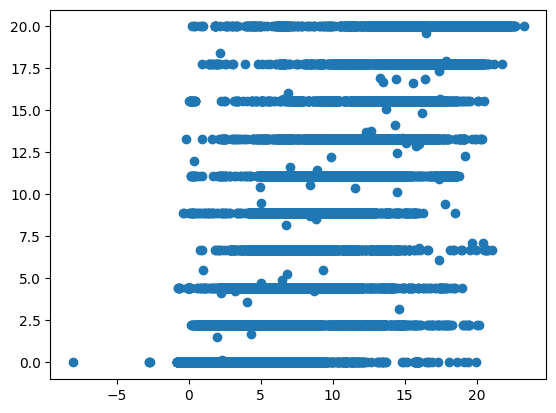

In [36]:
# We now need to make plots of the predicted vs actual values.
optim_co_standard_mlpr_model = optim_co_standard[0]
co_standard_mlpr_predictions = optim_co_standard_mlpr_model.predict(XCO_test)
plt.scatter(co_standard_mlpr_predictions, yCO_test)

In [61]:
# Store all necessary info about the models.
best_model_collections = [
          optim_co_standard, optim_co_robust, optim_h_standard, optim_h_robust,
          optim_co_standard_reduced, optim_co_robust_reduced, optim_h_standard_reduced, optim_h_robust_reduced,
          optim_lsvr_co_standard, optim_lsvr_co_robust, optim_lsvr_h_standard, optim_lsvr_h_robust,
          optim_lsvr_co_standard_reduced, optim_lsvr_co_robust_reduced, optim_lsvr_h_standard_reduced, optim_lsvr_h_robust_reduced]
best_models = [optim_co_standard[0], optim_co_robust[0], optim_h_standard[0], optim_h_robust[0],
          optim_co_standard_reduced[0], optim_co_robust_reduced[0], optim_h_standard_reduced[0], optim_h_robust_reduced[0],
          optim_lsvr_co_standard[0], optim_lsvr_co_robust[0], optim_lsvr_h_standard[0], optim_lsvr_h_robust[0],
          optim_lsvr_co_standard_reduced[0], optim_lsvr_co_robust_reduced[0], optim_lsvr_h_standard_reduced[0], optim_lsvr_h_robust_reduced[0]]
x_test_sets = [XCO_test, XCO_test, XH_test, XH_test,
               XCO_reduced_test, XCO_reduced_test, XH_reduced_test ,XH_reduced_test,
               XCO_train, XCO_train, XH_train ,XCO_train,
               XCO_reduced_train, XCO_reduced_train, XH_reduced_train, XH_reduced_train]
y_test_sets = [yCO_test, yCO_test, yH_test, yH_test,
               yCO_reduced_test, yCO_reduced_test, yH_reduced_test ,yH_reduced_test,
               yCO_train, yCO_train, yH_train ,yH_train,
               yCO_reduced_train, yCO_reduced_train, yH_reduced_train, yH_reduced_train]
best_model_labels = ["Optimized MLPR CO Standard Scaled", "Optimized MLPR CO Robust Scaled", "Optimized MLPR H Standard Scaled", "Optimized MLPR H Robust Scaled",
                "Optimized MLPR CO Standard Scaled Reduced", "Optimized MLPR CO Robust Scaled Reduced", "Optimized MLPR H Standard Scaled", "Optimized MLPR H Robust Scaled Reduced",
                "Optimized LSVR CO Standard Scaled", "Optimized LSVR CO Robust Scaled", "Optimized LSVR H Standard Scaled", "Optimized LSVR H Robust Scaled",
                "Optimized LSVR CO Standard Scaled Reduced", "Optimized LSVR CO Robust Scaled Reduced", "Optimized LSVR H Standard Scaled Reduced", "Optimized LSVR H Robust Scaled Reduced"]
predictions = []
residuals = []
for i in range(len(best_models)):
  curr_best_model = best_models[i]
  curr_x_test = x_test_sets[i]
  curr_y_test = y_test_sets[i]
  curr_best_model_label = best_model_labels[i]
  y_predictions = curr_best_model.predict(curr_x_test)
  predictions.append(y_predictions)
  # print(y_predictions.shape, len(y_predictions))
  # print(curr_y_test.shape, len(curr_y_test))
  # if len(y_predictions) > 100000:
  #   print(y_predictions, y_residuals)
  y_residuals = curr_y_test - y_predictions
  residuals.append(y_residuals)


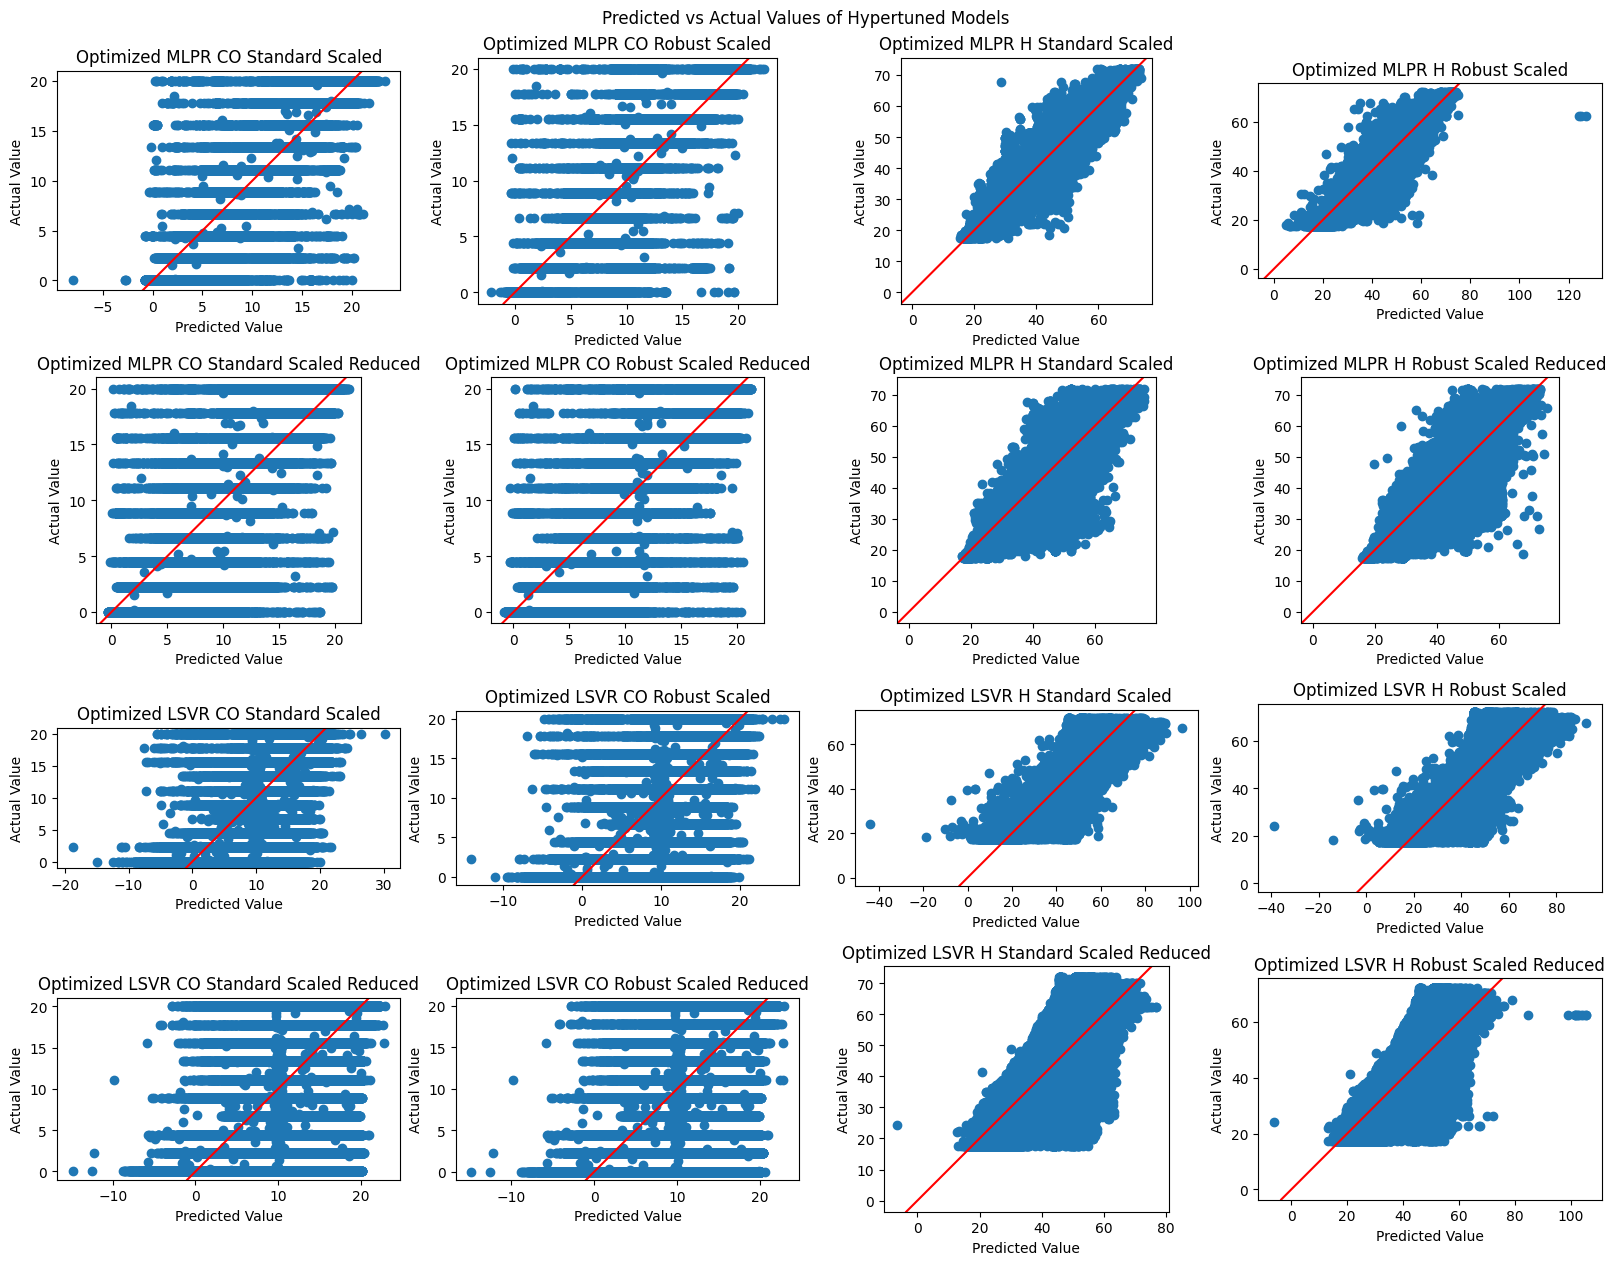

In [53]:
# Make plots of actual vs predicted values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Predicted vs Actual Values of Hypertuned Models")
for i in range(len(best_models)):
  curr_best_model = best_models[i]
  curr_x_test = x_test_sets[i]
  curr_y_test = y_test_sets[i]
  curr_best_model_label = best_model_labels[i]
  ax1 = fig.add_subplot(len(best_models)//4 + 1, 4, i + 1)
  ax1.set_xlabel("Predicted Value")
  ax1.set_ylabel("Actual Value")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  ax1.scatter(predictions[i], curr_y_test)
  # Plot the line y = x
  ax1.axline((0, 0), slope=1, color = "r")
  # Make sure that the axes are the same
  ax1.set_aspect('equal', adjustable='box')
plt.show()

(59144,) [ 0.74307123 -6.98747606 -0.51476497 ... -0.25874943 -0.66512667
 -0.8930274 ]
(59144,) [ 0.84308666 -9.10132767  0.2717817  ... -0.32370804  0.04988251
 -0.53587134]
(59144,) [-0.3524546   6.74038816 10.94822272 ...  0.55456113  3.10052018
 -1.23249477]
(59144,) [-5.14787469e-01  5.91388551e+00  8.81237693e+00 ...  1.54017391e+00
 -2.53725930e-02  2.29177272e-03]
(59144,) [ -0.3594028  -10.63263195   0.71099747 ...   1.83952301   0.78437593
  -0.56896041]
(59144,) [ -1.2327428  -10.67064938  -0.23595273 ...  -0.11792248   0.12541901
  -1.24271114]
(59144,) [-2.08553415 12.84774592  1.70795029 ...  5.89939957  0.21991687
 -2.83303147]
(59144,) [-1.76348372 18.49586945  1.92892263 ...  3.87296319 -2.63368178
  1.41235522]
(236575,) [-1.25183939  1.45747394  1.25386074 ...  0.40246972  9.36706008
  0.82972565]
(236575,) [-1.14302767  0.51189942  0.41269009 ...  1.18302609  9.34387123
  0.98348395]
(236575,) [-2.43211744  6.2419492   1.11696796 ...  0.85830033  3.33538059
  6.056

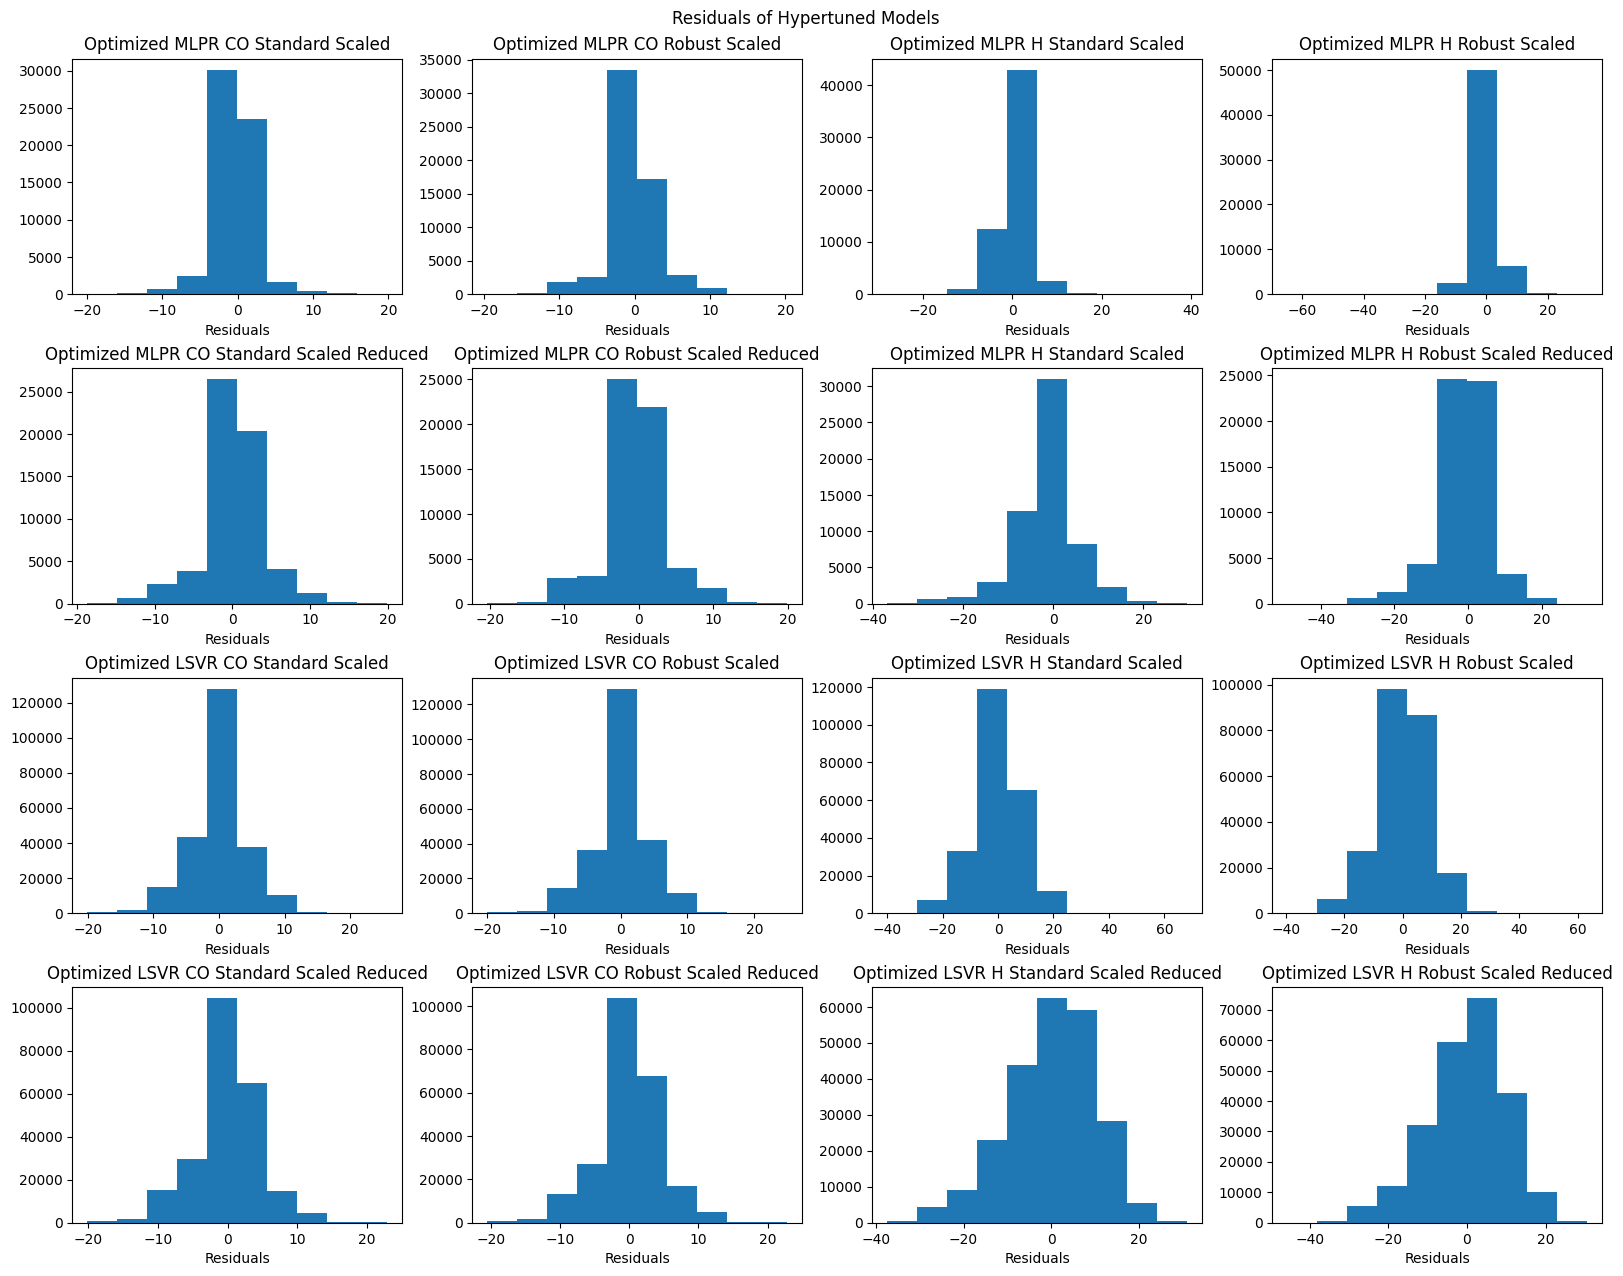

In [56]:
# Make plots of actual vs predicted values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Residuals of Hypertuned Models")
for i in range(len(best_models)):
  curr_best_model = best_models[i]
  curr_x_test = x_test_sets[i]
  curr_y_test = y_test_sets[i]
  curr_best_model_label = best_model_labels[i]
  ax1 = fig.add_subplot(len(best_models)//4 + 1, 4, i + 1)
  ax1.set_xlabel("Residuals")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  print(residuals[i].shape, residuals[i])
  ax1.hist(residuals[i])
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

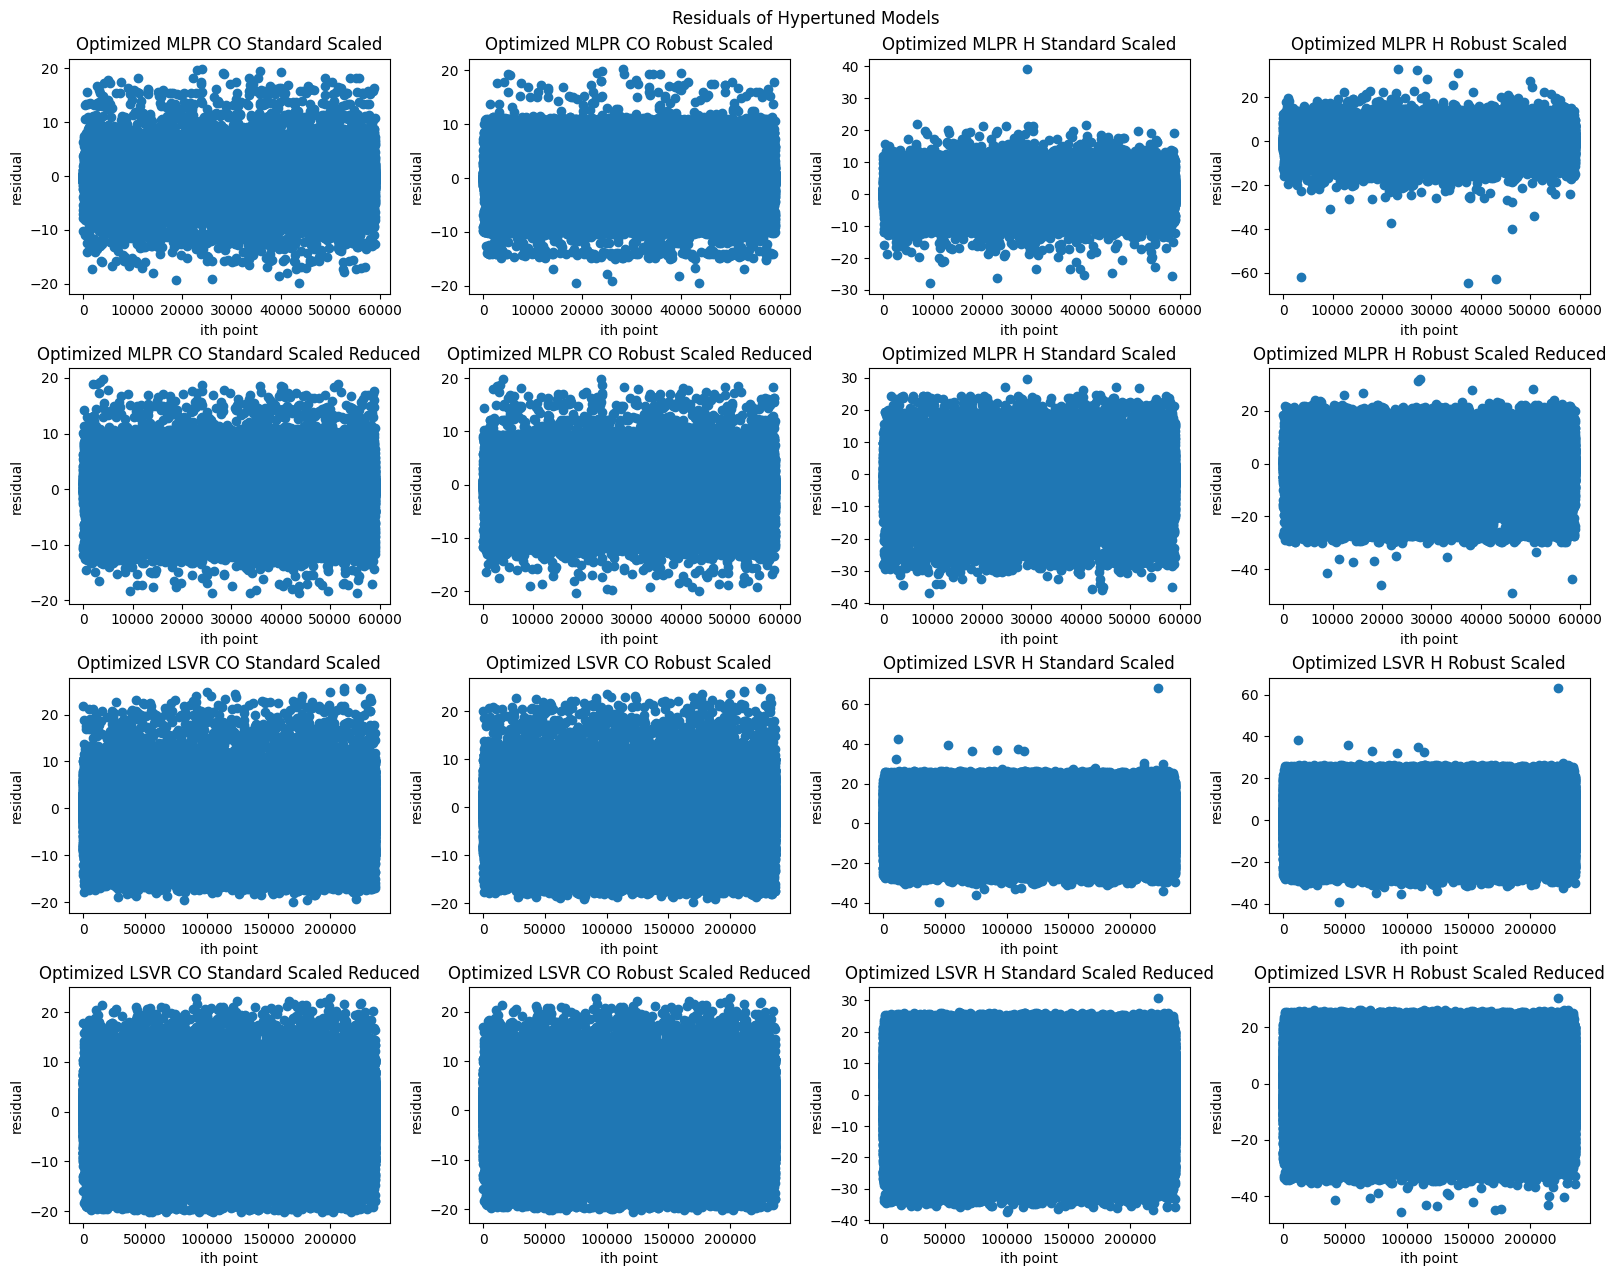

In [59]:
# Make plots of ith point vs residual to check independence of residuals
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Residuals of Hypertuned Models")
for i in range(len(best_models)):
  curr_best_model = best_models[i]
  curr_x_test = x_test_sets[i]
  curr_y_test = y_test_sets[i]
  curr_best_model_label = best_model_labels[i]
  ax1 = fig.add_subplot(len(best_models)//4 + 1, 4, i + 1)
  ax1.set_xlabel("ith point")
  ax1.set_ylabel("residual")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  ax1.scatter(range(len(residuals[i])),residuals[i])
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

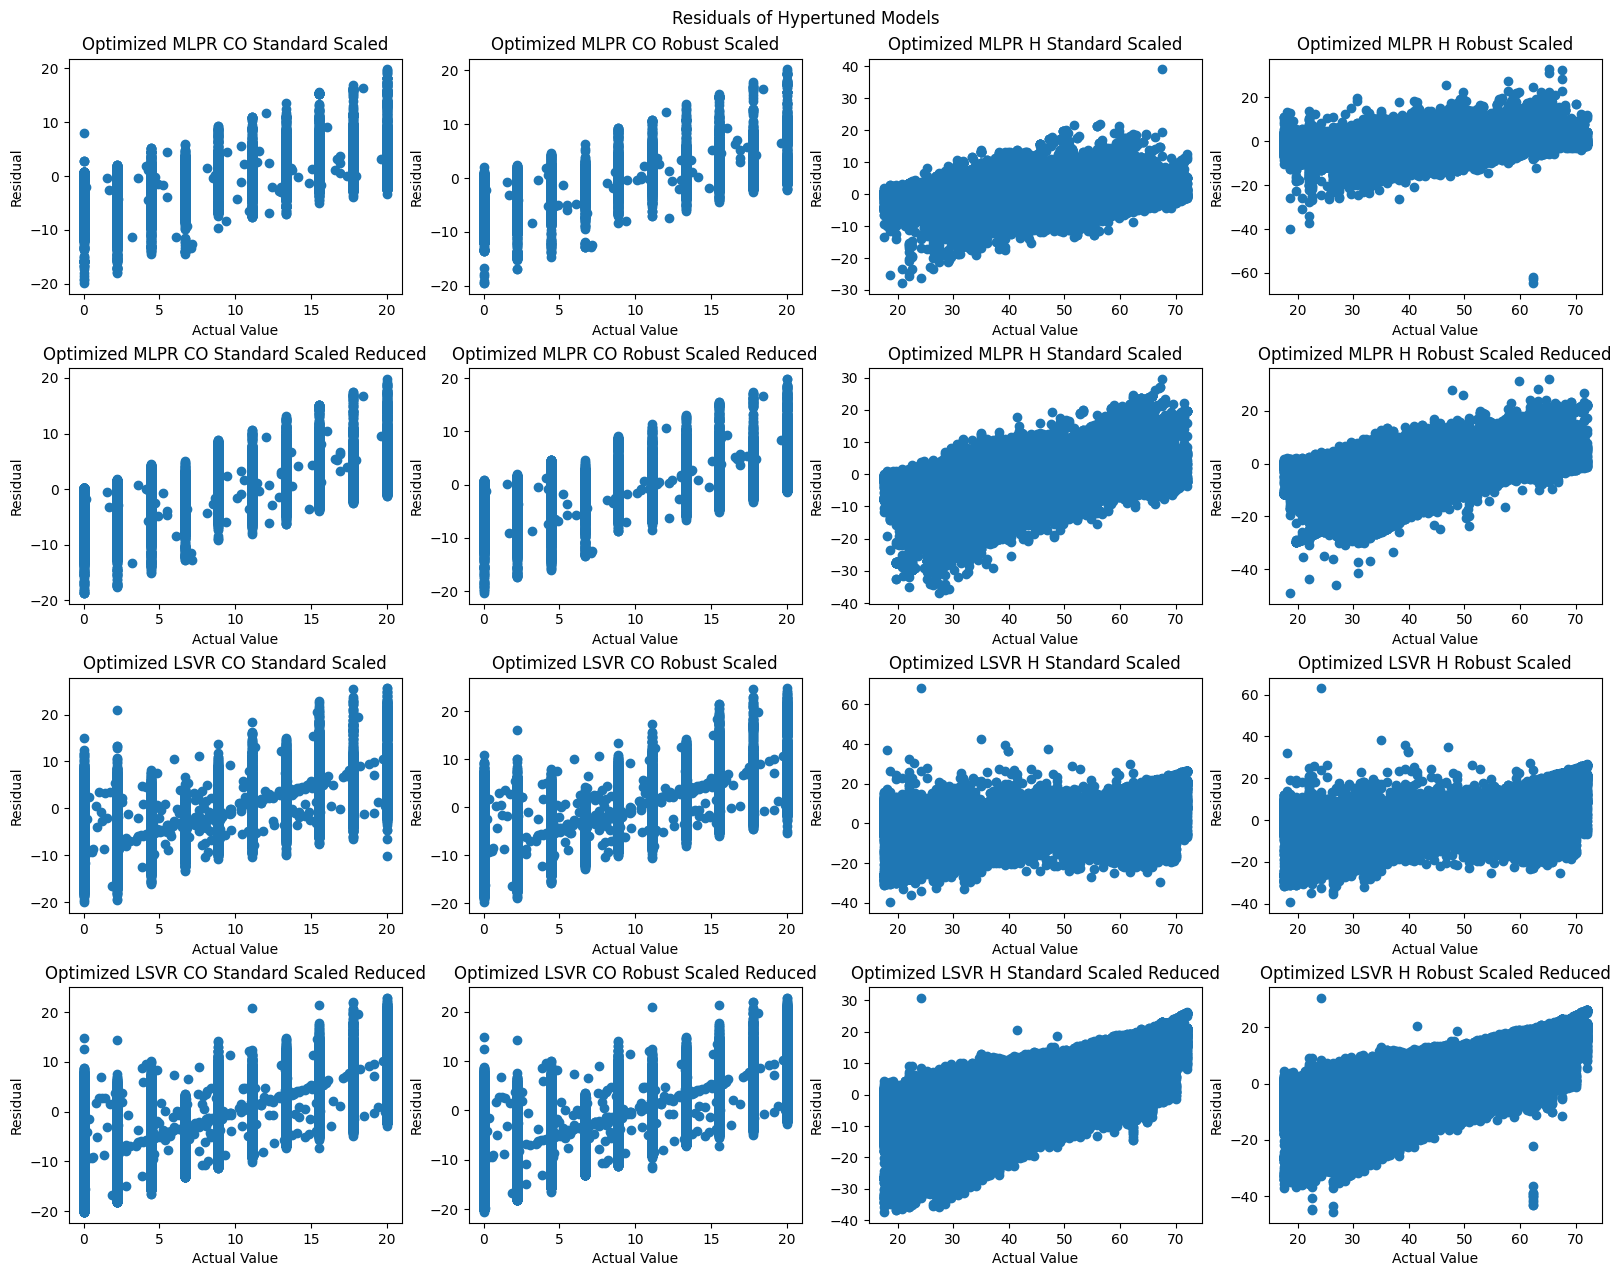

In [60]:
# Make plots of actual vs residual to check variance
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Residuals of Hypertuned Models")
for i in range(len(best_models)):
  curr_best_model = best_models[i]
  curr_x_test = x_test_sets[i]
  curr_y_test = y_test_sets[i]
  curr_best_model_label = best_model_labels[i]
  ax1 = fig.add_subplot(len(best_models)//4 + 1, 4, i + 1)
  ax1.set_xlabel("Actual Value")
  ax1.set_ylabel("Residual")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  ax1.scatter(curr_y_test,residuals[i])
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()